# Project Group - 2
**A stormy flight: Investigating the correlation between weather patterns and delays on the JFK-LAX route**


Members: Nynke Leppink, Alexander du Marchie Sarvaas, Samuel du Marchie Sarvaas, Sanne van Proosdij, Emma Toet

Student numbers: 5070988, 5547156, 4802829, 5326990, 4849892 

In [1]:
import pandas as pd
import numpy as np
weather_JFK = pd.read_csv('JFK.csv')
#weather_JFK[['Date', 'Time']] = weather_JFK['valid'].str.split(' ', expand=True)
#weather_JFK['p01i'].str.contains('T') = 

weather_JFK = weather_JFK.drop(['tmpf', 'dwpf', 'relh', 'drct', 'mslp', 'skyl1',
                                "skyl2",  'skyl3', 'skyl4',  'wxcodes', 'feel', 'ice_accretion_1hr', 'ice_accretion_3hr',
                                'ice_accretion_6hr', 'peak_wind_gust', 'peak_wind_drct', 'peak_wind_time', 'snowdepth', 'metar'], axis=1)

weather_JFK = weather_JFK[['station', 'valid', 'sknt', 'gust', 'p01i', 'alti', 'vsby', 'skyc1', 'skyc2', 'skyc3', 'skyc4']]
weather_JFK.rename(columns={
    'sknt': 'Wind Speed [in knots]',
    'gust': 'Wind Gust [in knots]',
    'vsby': 'Visibility [in miles]',
    'p01i': 'One hour precipitation [in inches]',
    'alti': 'Pressure altimeter [in inches]',
    'skyc1': 'Sky Level 1 Coverage',
    'skyc2': 'Sky Level 2 Coverage',
    'skyc3': 'Sky Level 3 Coverage',
    'skyc4': 'Sky Level 4 Coverage'
}, inplace = True)

weather_JFK = weather_JFK[weather_JFK['valid'].str.endswith(':51')]

coverage_mapping = {
    'CLR': 1,  # Clear
    'FEW': 2,  # Few
    'SCT': 3,  # Scattered
    'BKN': 4,  # Broken
    'OVC': 5,  # Overcast
    'VV ': 6    # Vertical Visibility
}

weather_JFK['Sky Level 1 Coverage'] = weather_JFK['Sky Level 1 Coverage'].map(coverage_mapping)
weather_JFK['Sky Level 2 Coverage'] = weather_JFK['Sky Level 2 Coverage'].map(coverage_mapping)
weather_JFK['Sky Level 3 Coverage'] = weather_JFK['Sky Level 3 Coverage'].map(coverage_mapping)
weather_JFK['Sky Level 4 Coverage'] = weather_JFK['Sky Level 4 Coverage'].map(coverage_mapping)

display(weather_JFK)


station             valid  Wind Speed [in knots]  Wind Gust [in knots]  \
0        JFK  2013-01-01 00:51                   14.0                   NaN   
1        JFK  2013-01-01 01:51                   15.0                   NaN   
2        JFK  2013-01-01 02:51                   17.0                   NaN   
3        JFK  2013-01-01 03:51                   16.0                   NaN   
4        JFK  2013-01-01 04:51                   13.0                   NaN   
...      ...               ...                    ...                   ...   
9828     JFK  2013-12-31 19:51                   12.0                   NaN   
9829     JFK  2013-12-31 20:51                   16.0                   NaN   
9830     JFK  2013-12-31 21:51                   18.0                  26.0   
9831     JFK  2013-12-31 22:51                   18.0                  24.0   
9832     JFK  2013-12-31 23:51                   15.0                  24.0   

     One hour precipitation [in inches]  Pressure altimeter [in inches]  \
0                                  0.00                           29.96   
1                                  0.00                           29.93   
2                                  0.00                           29.92   
3                                  0.00                           29.92   
4                                  0.00                           29.92   
...                                 ...                             ...   
9828                               0.00                           30.09   
9829                                  T                           30.12   
9830                                  T                           30.13   
9831                               0.00                           30.15   
9832                               0.00                           30.19   

      Visibility [in miles]  Sky Level 1 Coverage  Sky Level 2 Coverage  \
0                      10.0                     5                   NaN   
1                      10.0                     5                   NaN   
2                      10.0                     5                   NaN   
3                      10.0                     5                   NaN   
4                      10.0                     5                   NaN   
...                     ...                   ...                   ...   
9828                   10.0                     2                   4.0   
9829                    9.0                     4                   4.0   
9830                   10.0                     2                   3.0   
9831                   10.0                     2                   NaN   
9832                   10.0                     2                   NaN   

      Sky Level 3 Coverage  Sky Level 4 Coverage  
0                      NaN                   NaN  
1                      NaN                   NaN  
2                      NaN                   NaN  
3                      NaN                   NaN  
4                      NaN                   NaN  
...                    ...                   ...  
9828                   4.0                   NaN  
9829                   NaN                   NaN  
9830                   NaN                   NaN  
9831                   NaN                   NaN  
9832                   NaN                   NaN  

[8747 rows x 11 columns]

In [2]:
weather_JFK.to_csv('modified_weather_JFK.csv', index = False)

The dataframe for the weather variables at LAX are modified in tbe following cell and the output of the dataframe is given.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

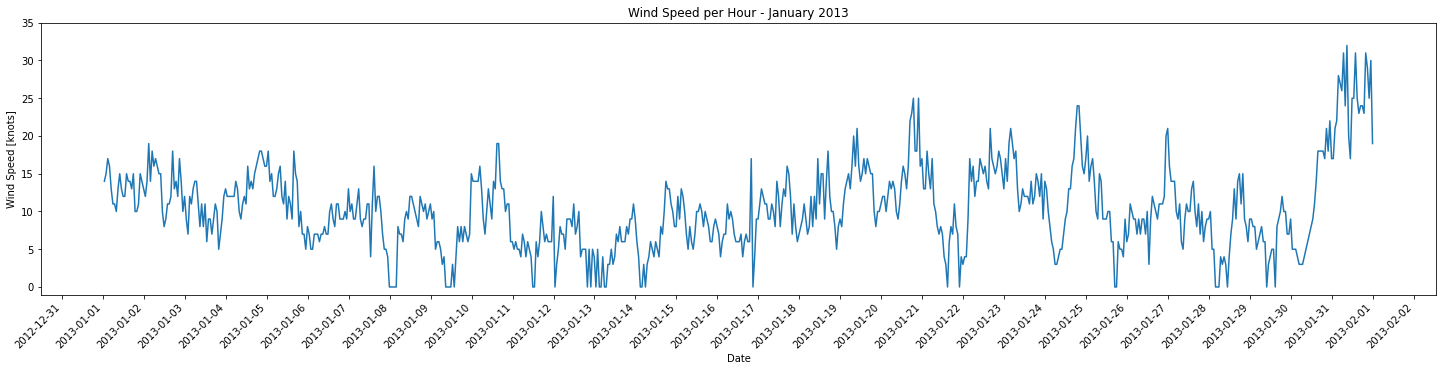

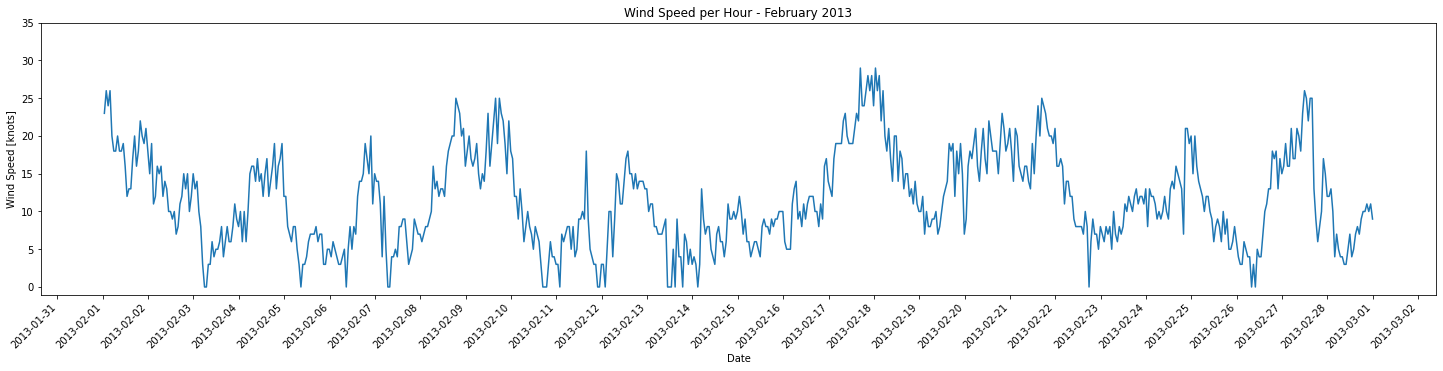

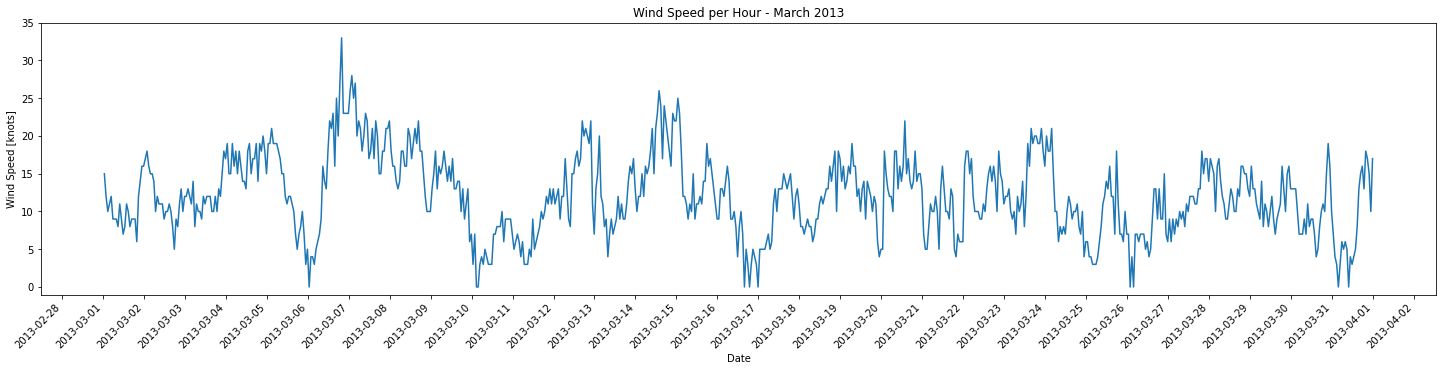

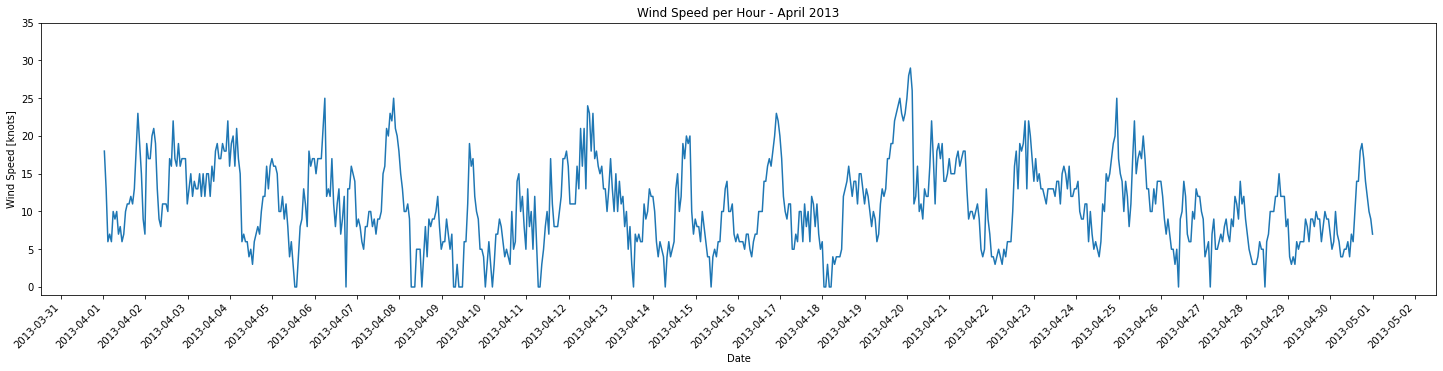

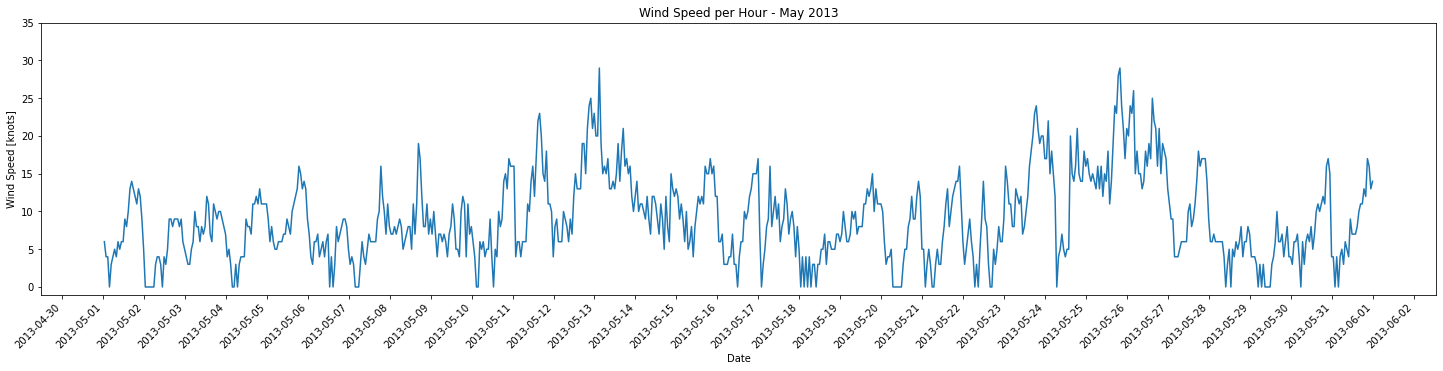

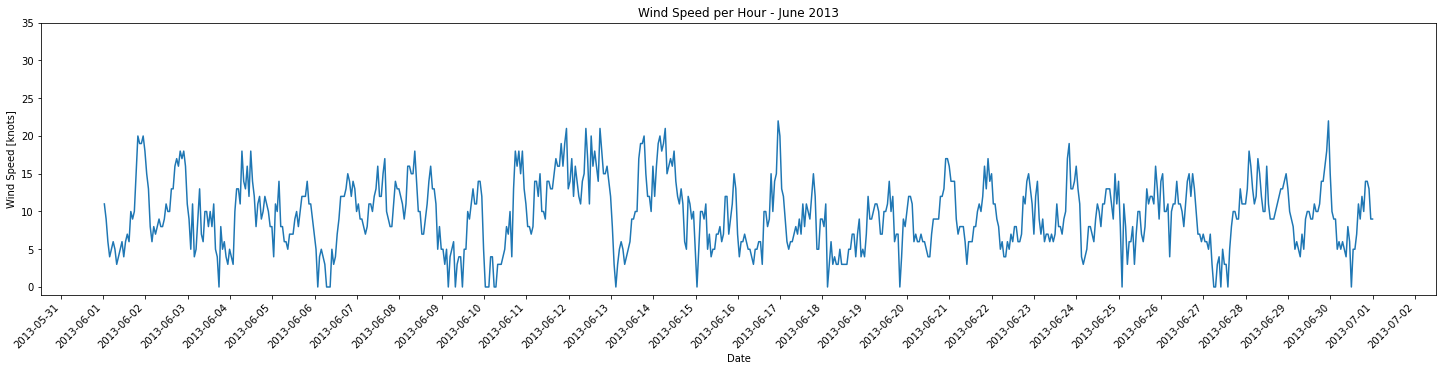

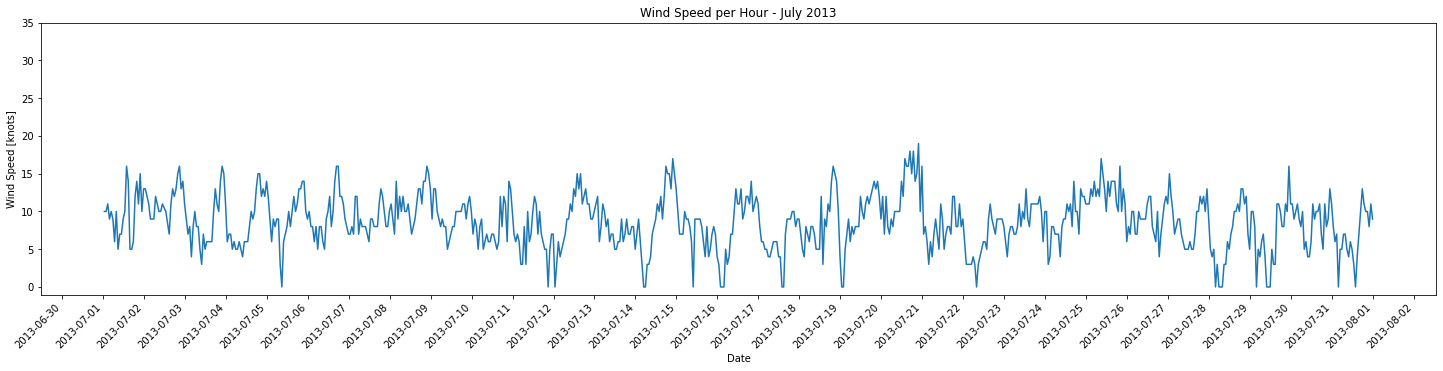

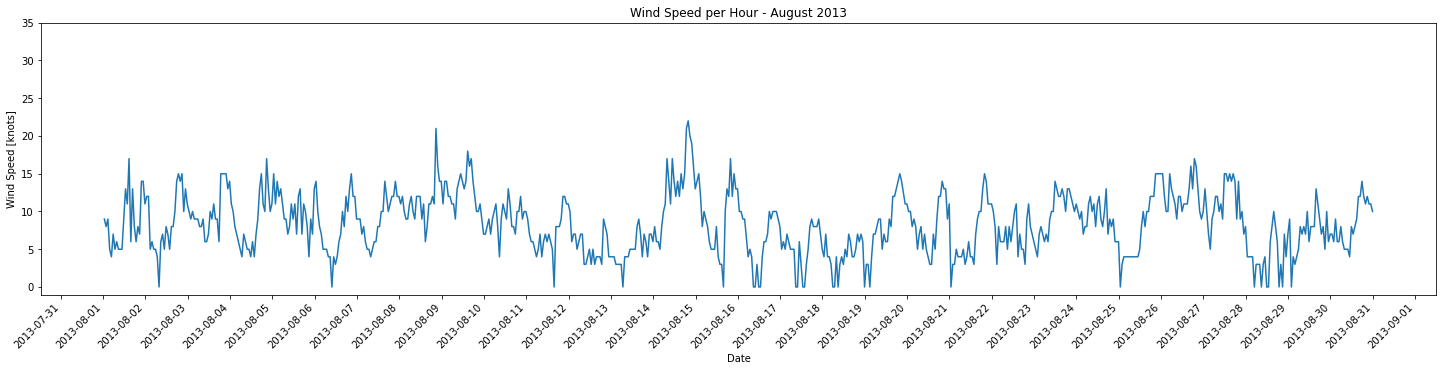

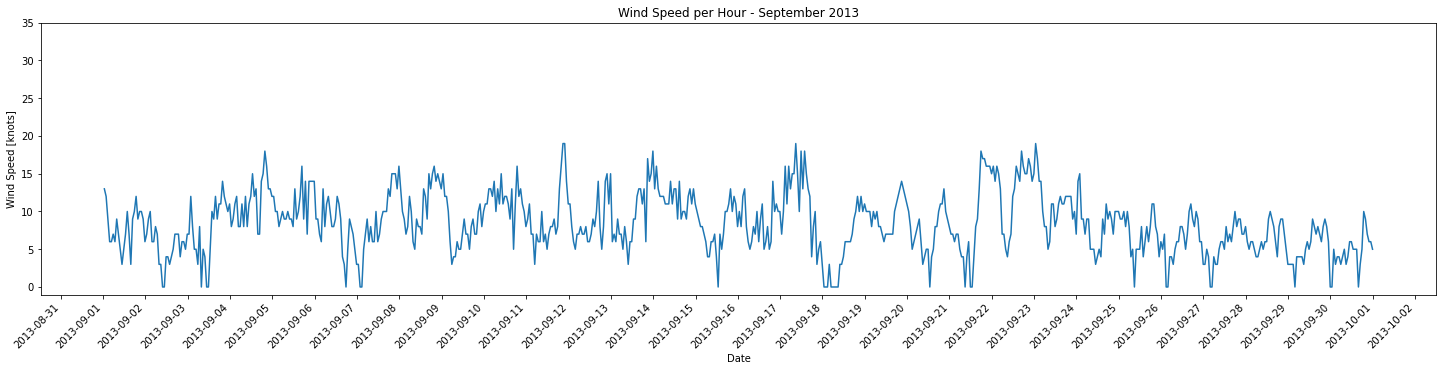

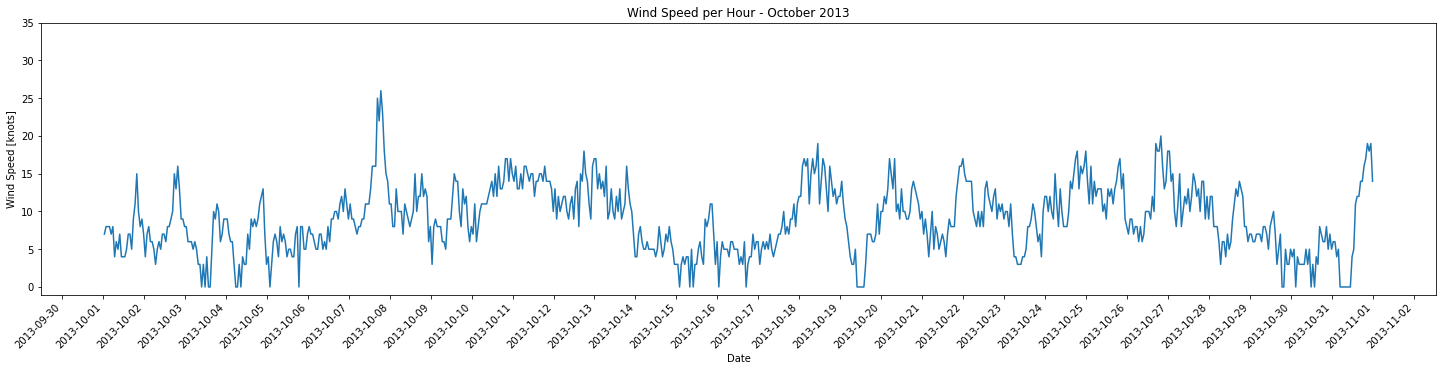

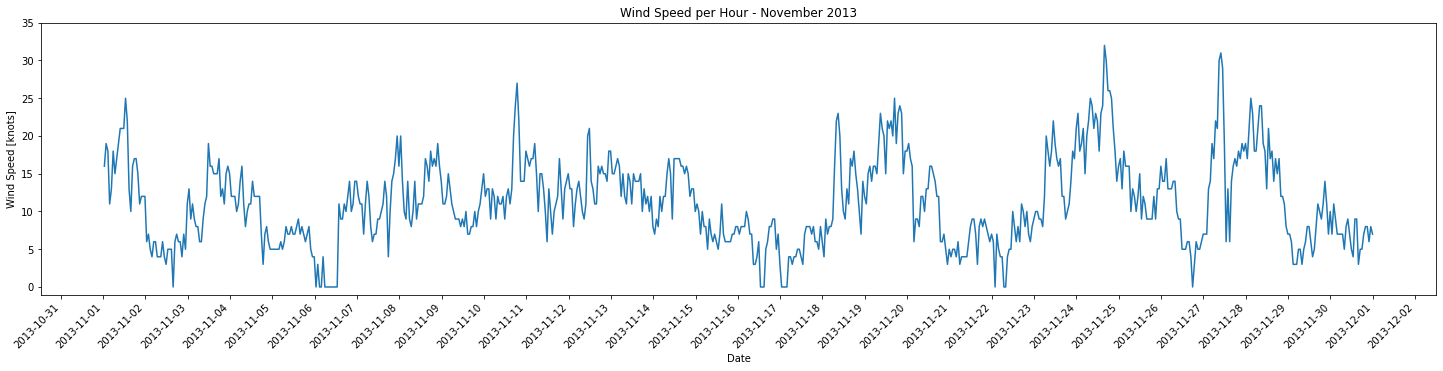

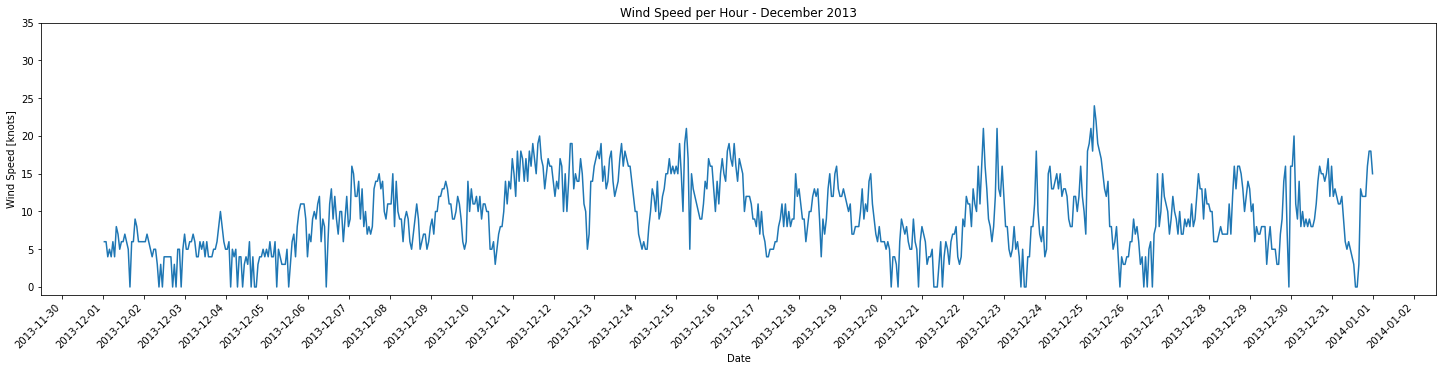

In [4]:
# Zorg ervoor dat de 'valid' kolom al is omgezet naar datetime
weather_JFK['valid'] = pd.to_datetime(weather_JFK['valid'])

# Zet 'valid' als index voor gemakkelijke tijd-gebaseerde filtering (optioneel maar handig)
weather_JFK = weather_JFK.set_index('valid')

# Filteren op de gehele DataFrame (dus inclusief Wind Speed en andere kolommen) voor de maand januari 2013
weather_JFK_january = weather_JFK['2013-01-01 00:51':'2013-01-31 23:51']
weather_JFK_februari = weather_JFK['2013-02-01 00:51':'2013-02-28 23:51']
weather_JFK_march = weather_JFK['2013-03-01 00:51':'2013-03-31 23:51']
weather_JFK_april = weather_JFK['2013-04-01 00:51':'2013-04-30 23:51']
weather_JFK_may = weather_JFK['2013-05-01 00:51':'2013-05-31 23:51']
weather_JFK_june = weather_JFK['2013-06-01 00:51':'2013-06-30 23:51']
weather_JFK_july = weather_JFK['2013-07-01 00:51':'2013-07-31 23:51']
weather_JFK_august = weather_JFK['2013-08-01 00:51':'2013-08-30 23:51']
weather_JFK_september = weather_JFK['2013-09-01 00:51':'2013-09-30 23:51']
weather_JFK_october = weather_JFK['2013-10-01 00:51':'2013-10-31 23:51']
weather_JFK_november = weather_JFK['2013-11-01 00:51':'2013-11-30 23:51']
weather_JFK_december = weather_JFK['2013-12-01 00:51':'2013-12-31 23:51']

weather_JFK_month = [weather_JFK_january, weather_JFK_februari, weather_JFK_march, 
                                        weather_JFK_april, weather_JFK_may, weather_JFK_june, weather_JFK_july, 
                                        weather_JFK_august, weather_JFK_september, weather_JFK_october, weather_JFK_november, 
                                        weather_JFK_december]

month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 
               'December']

#display(weather_JFK_january)

for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Wind Speed [in knots]'])
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.ylim(-1, 35)

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Wind Speed [knots]')
    plt.title(f'Wind Speed per Hour - {month_names[i]} 2013');
    #plt.legend();


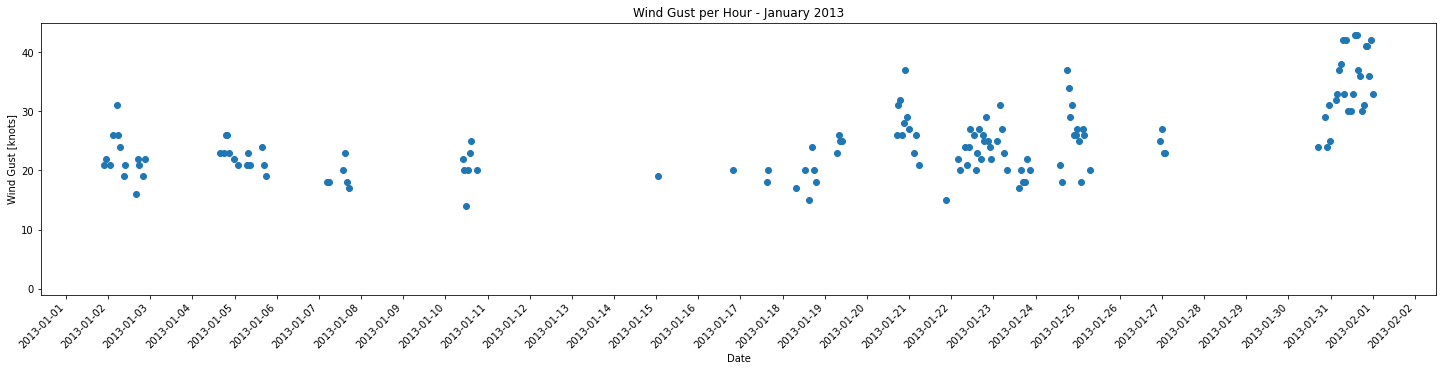

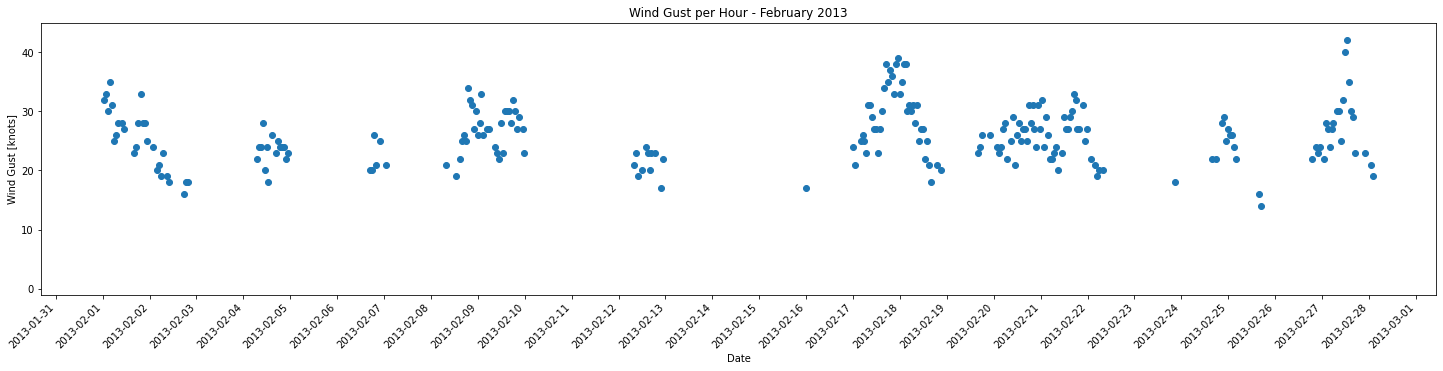

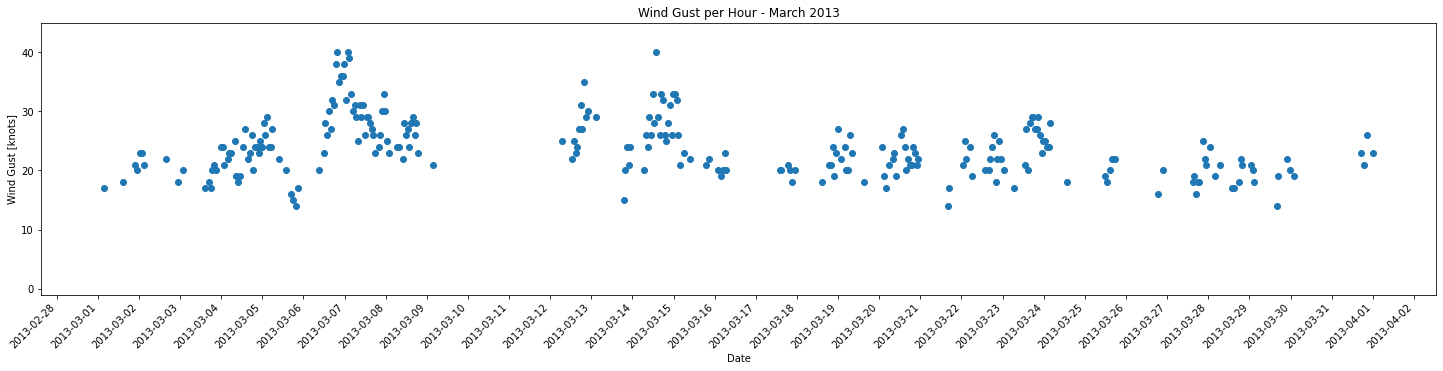

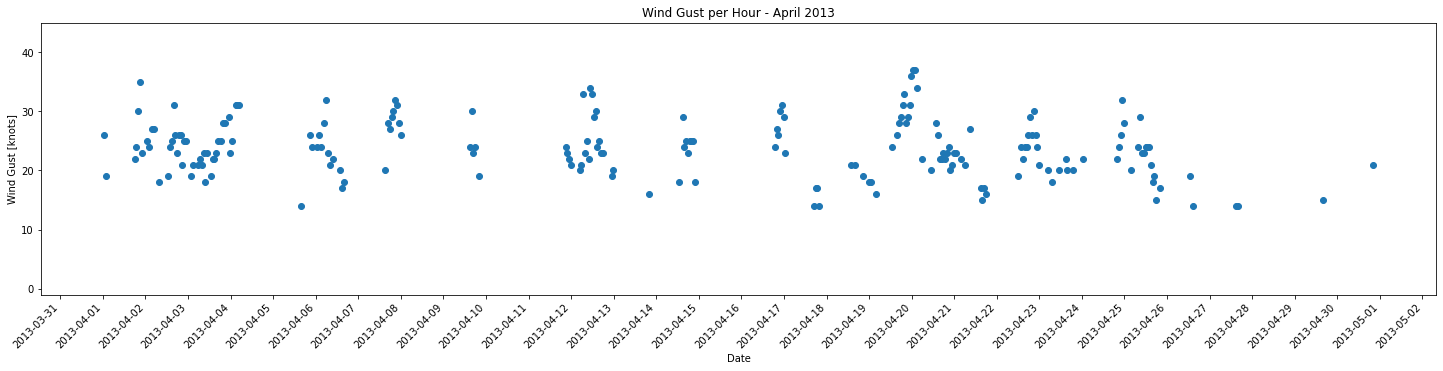

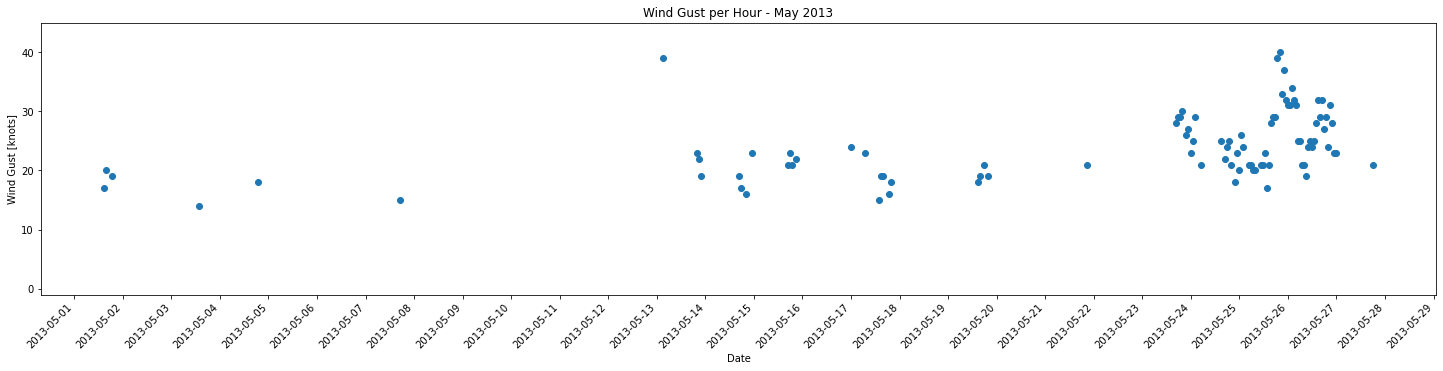

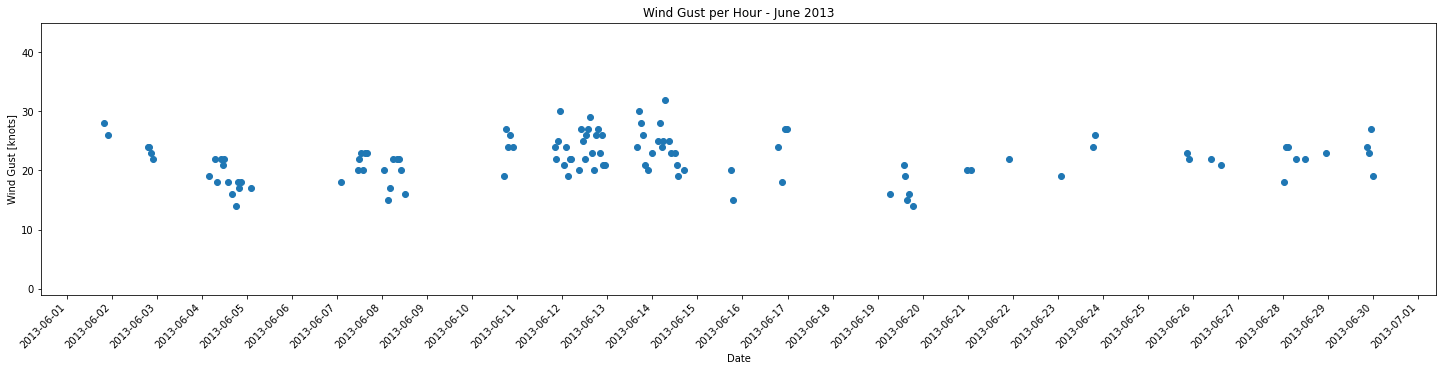

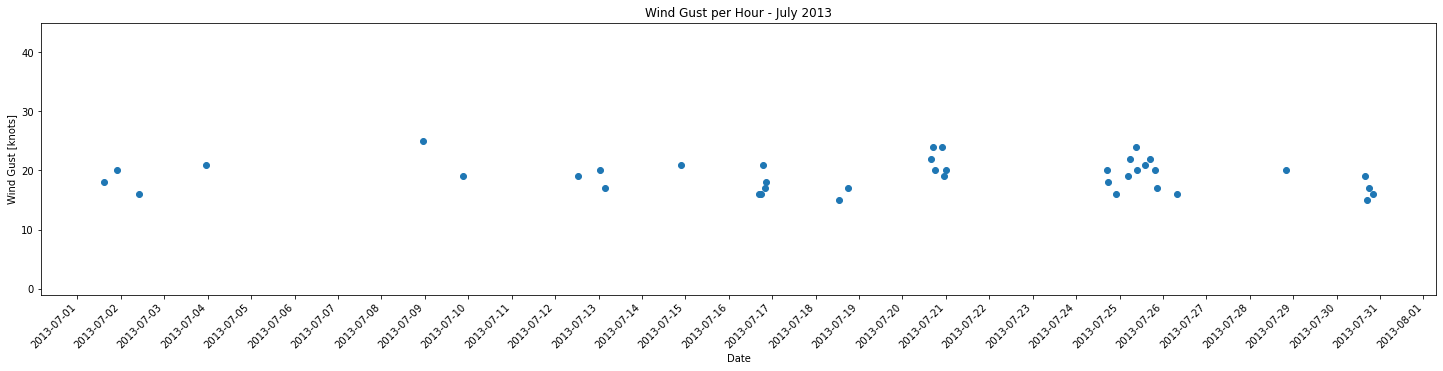

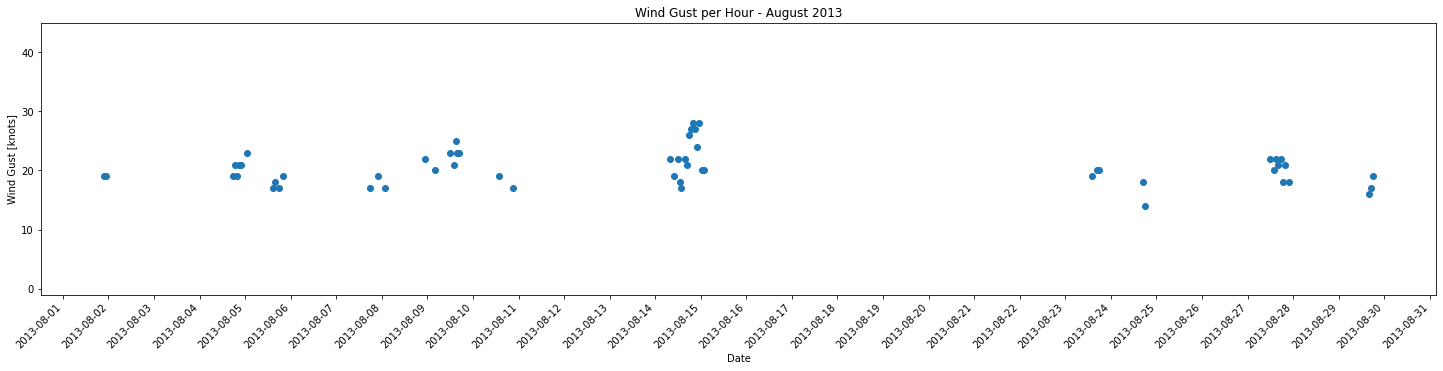

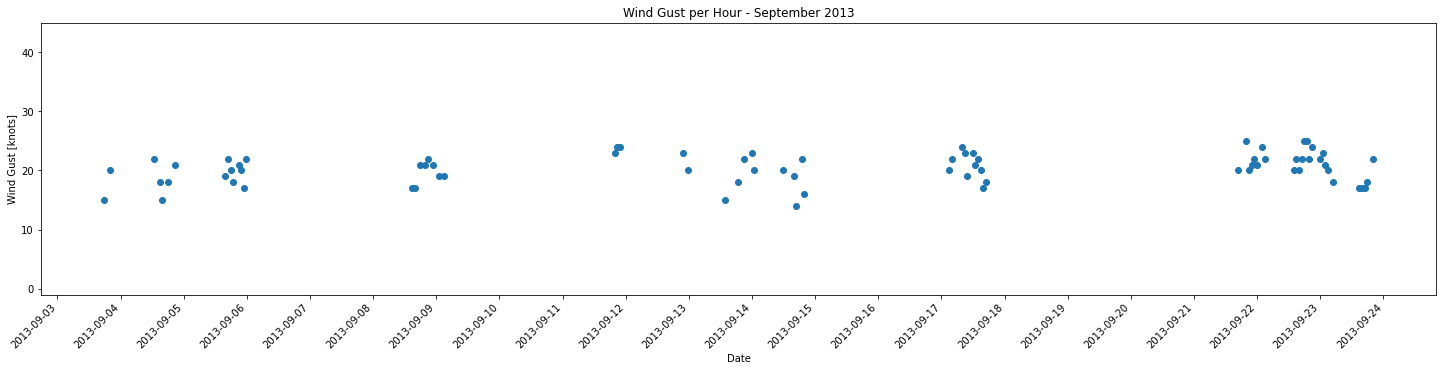

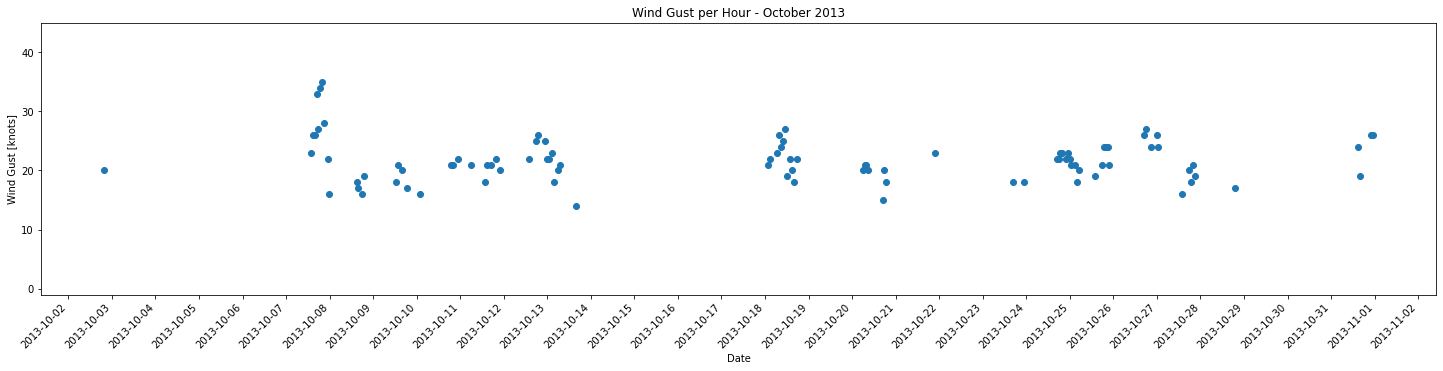

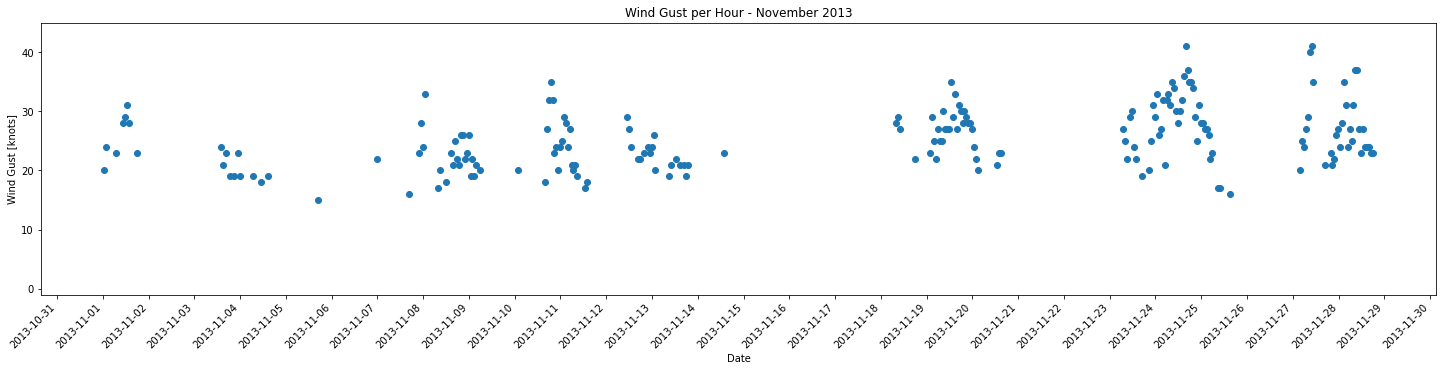

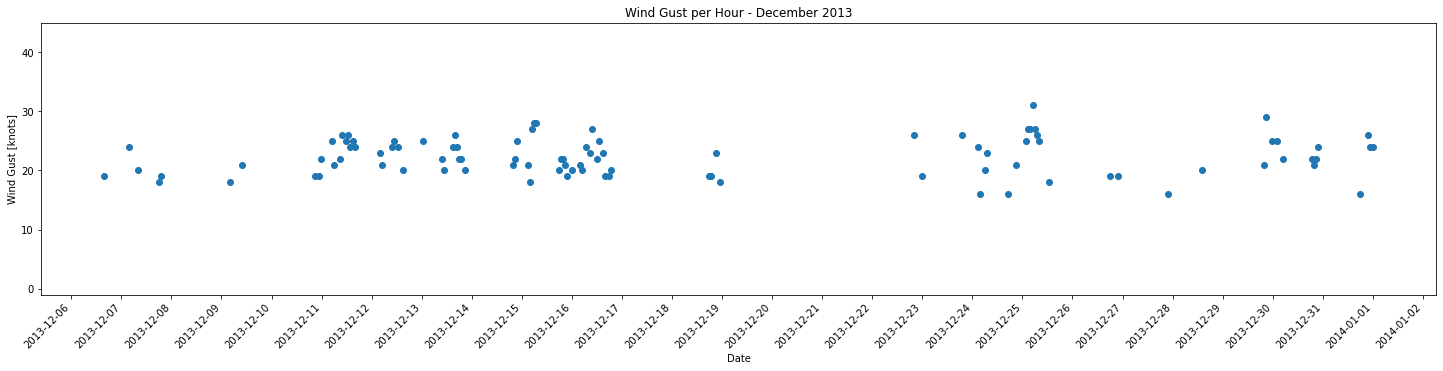

In [5]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Wind Gust [in knots]'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.ylim(-1, 45)

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Wind Gust [knots]')
    plt.title(f'Wind Gust per Hour - {month_names[i]} 2013');
    #plt.legend();

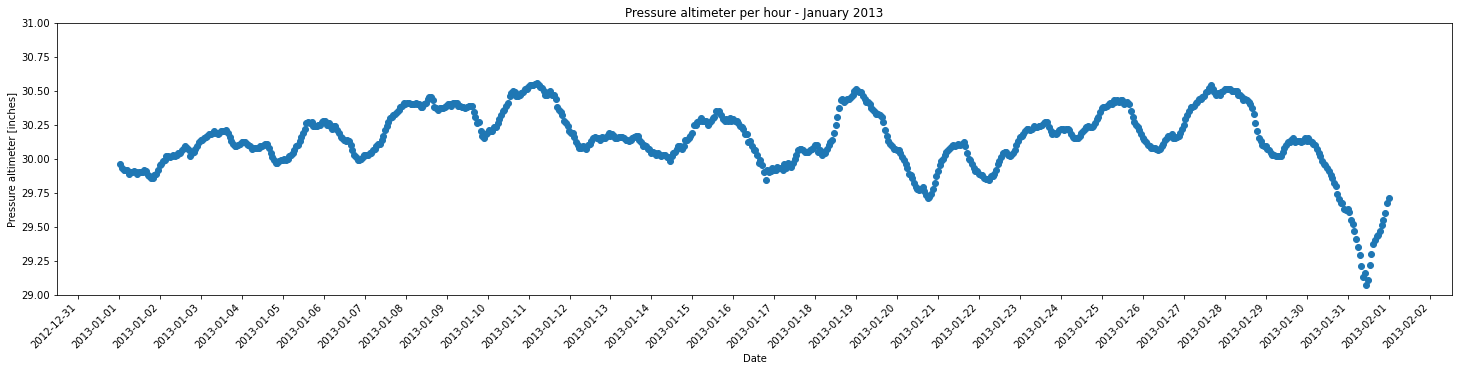

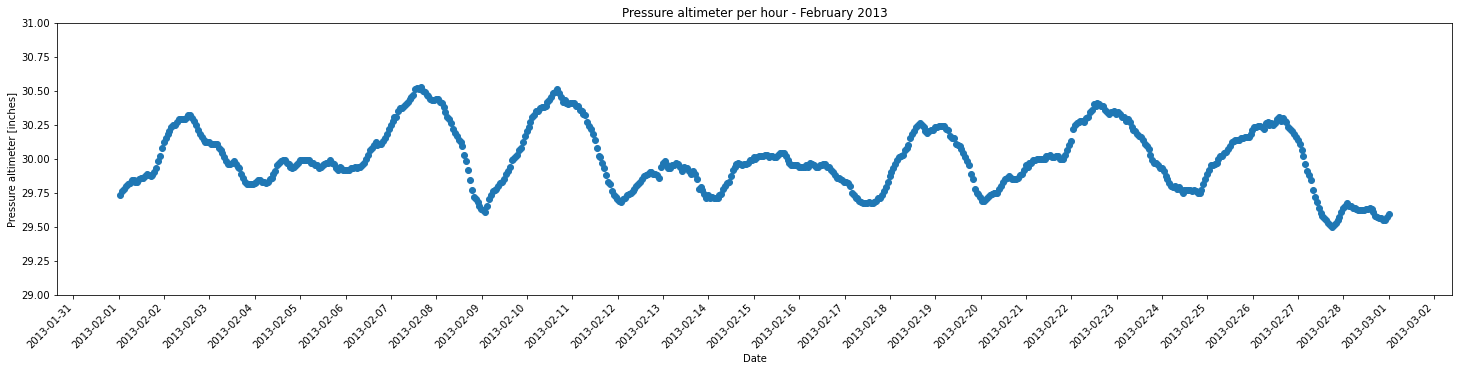

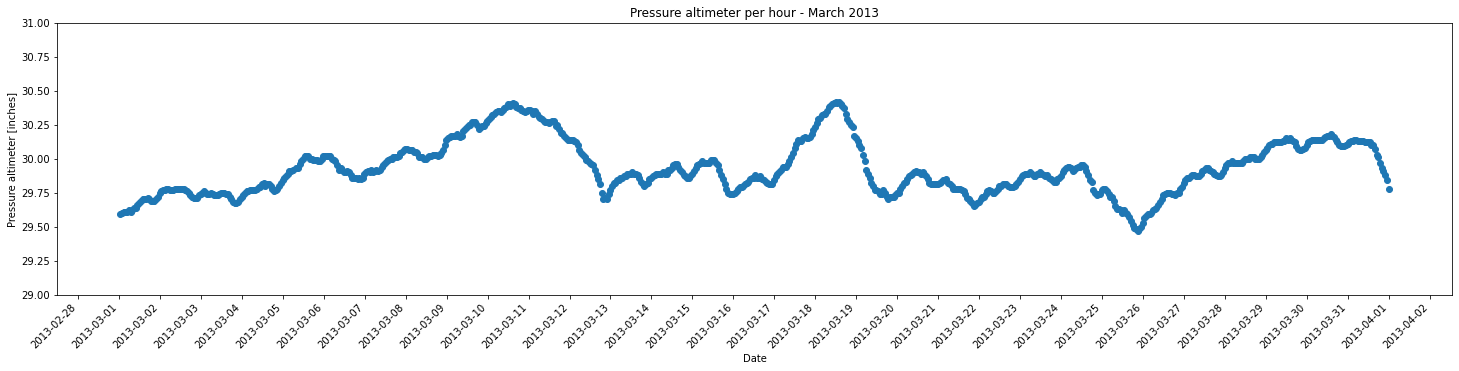

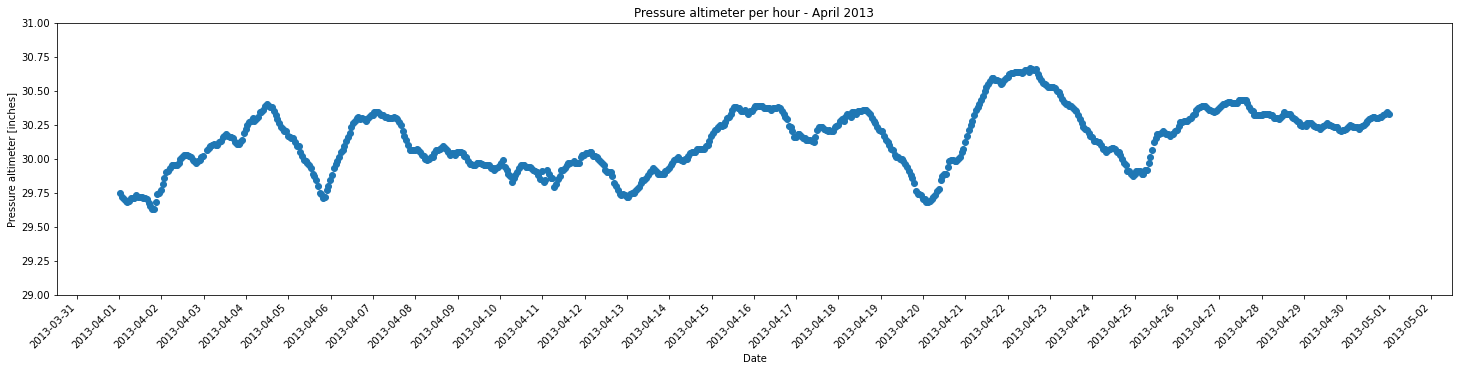

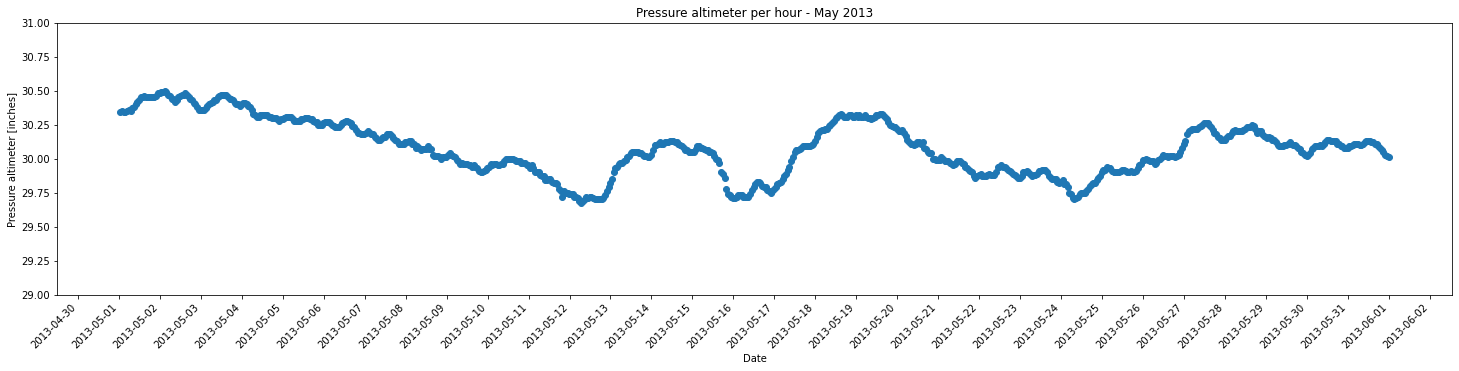

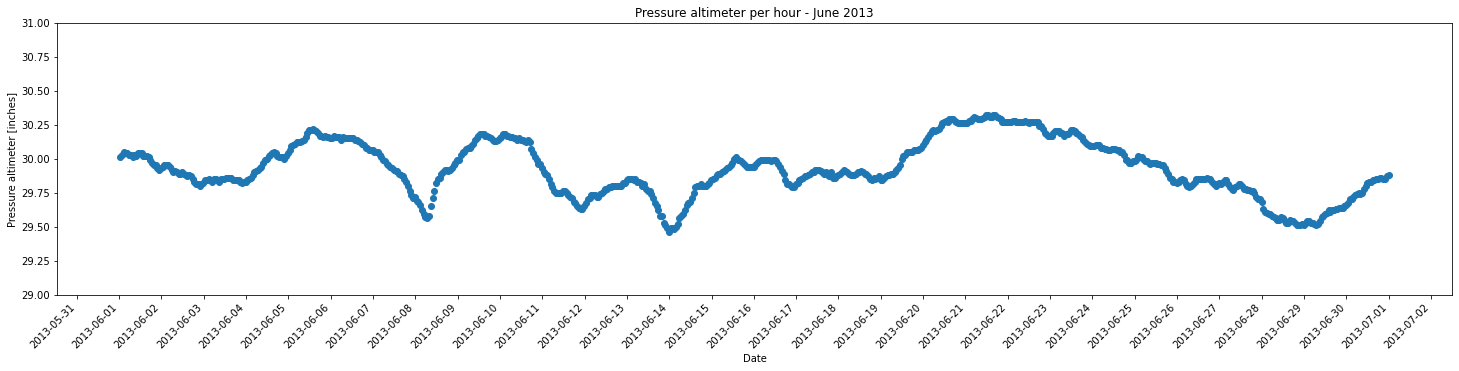

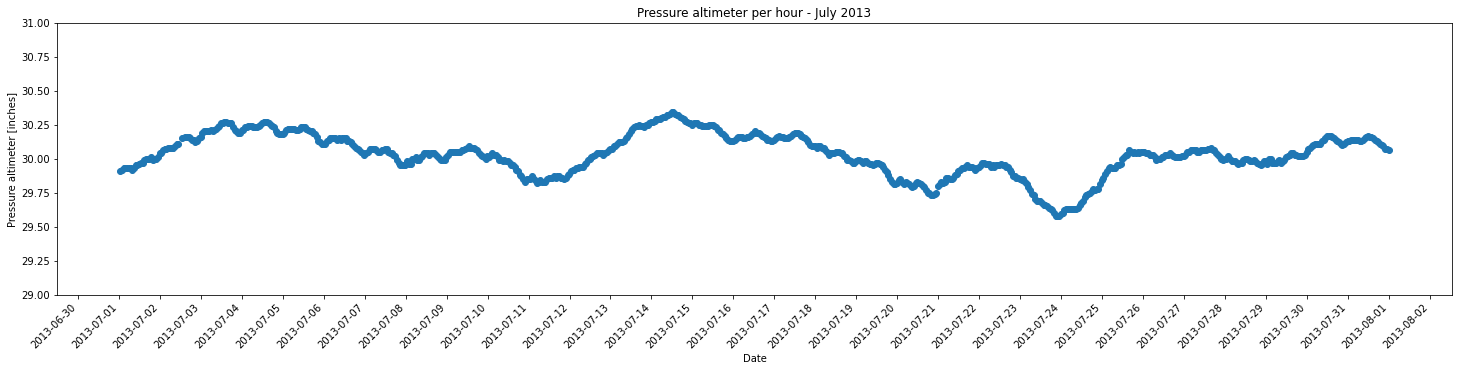

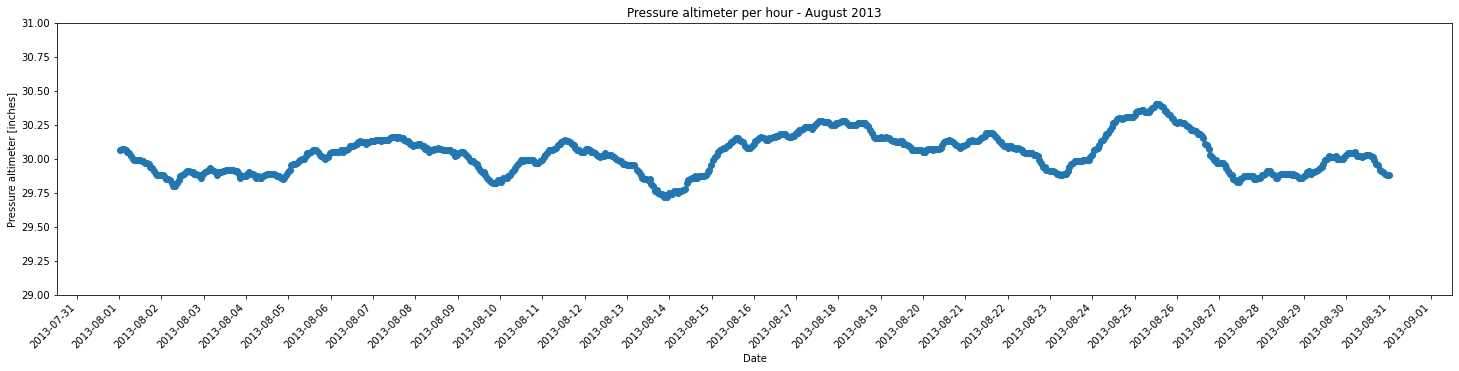

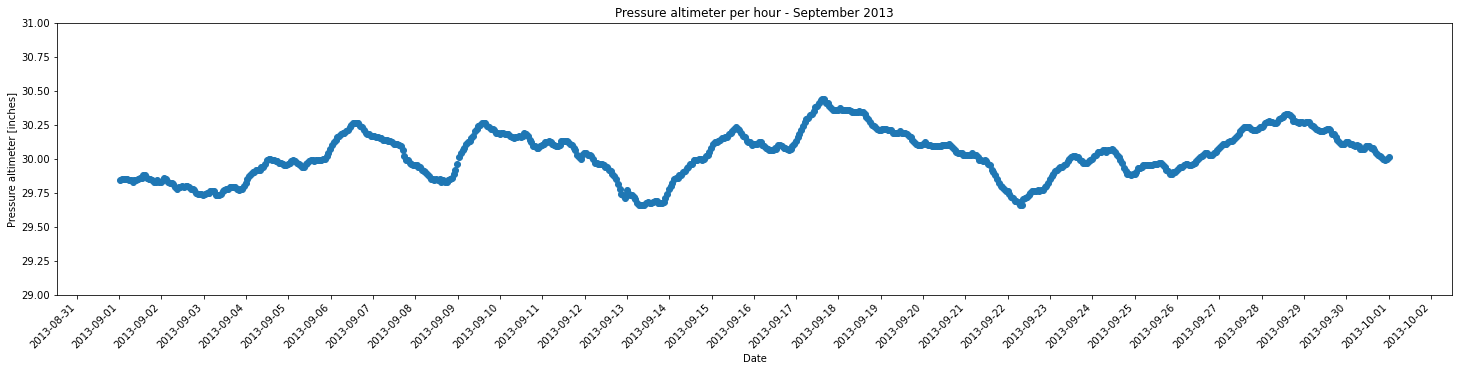

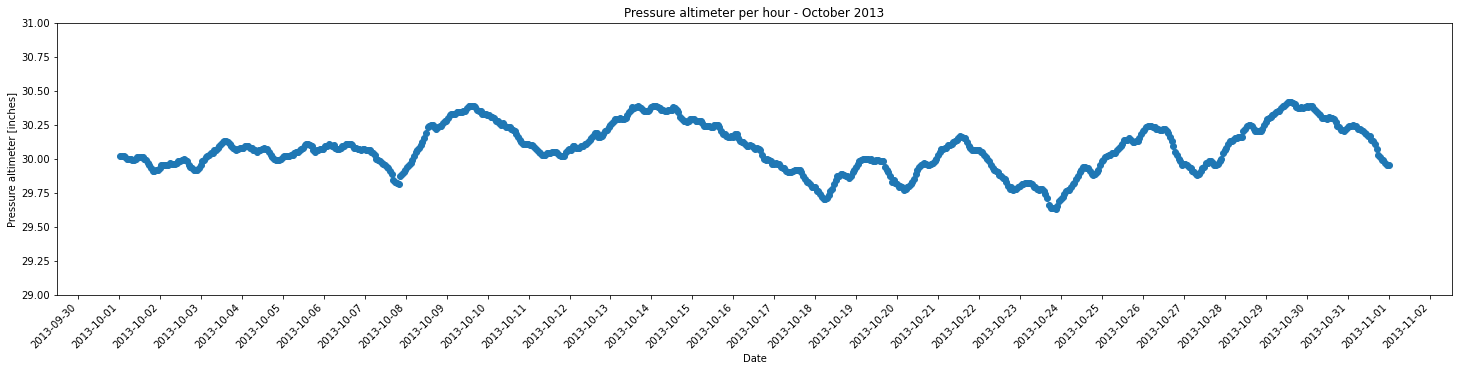

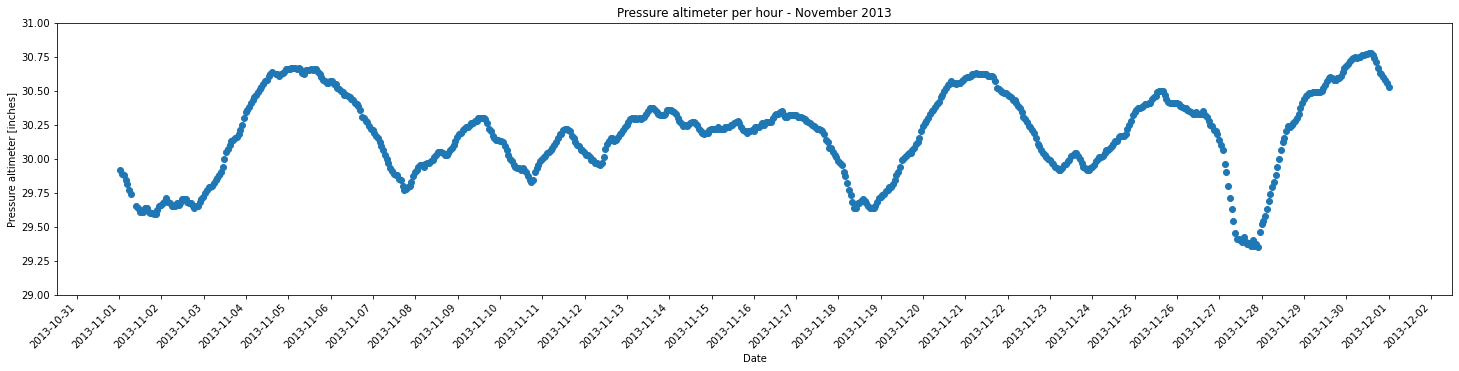

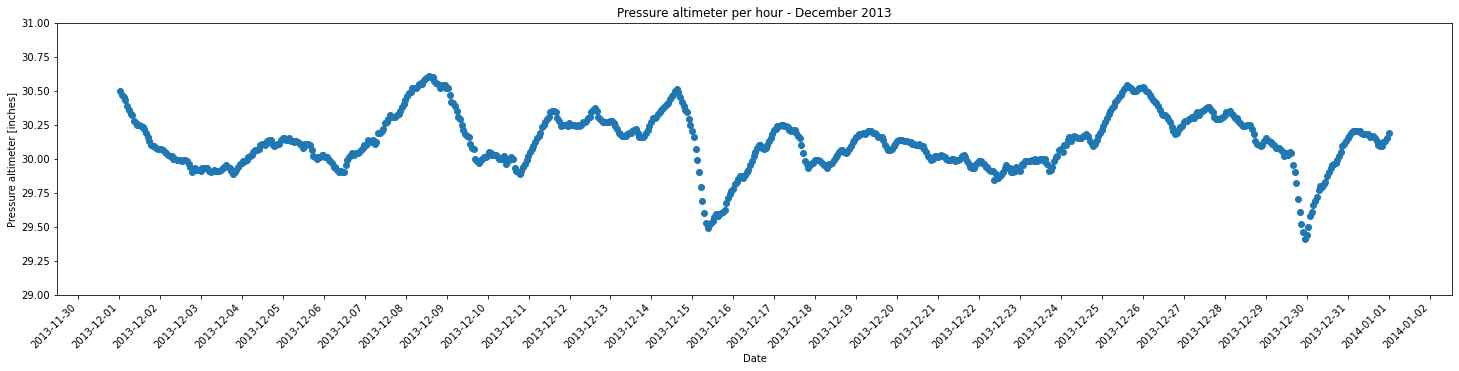

In [6]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Pressure altimeter [in inches]'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.ylim(29, 31)

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Pressure altimeter [inches]')
    plt.title(f'Pressure altimeter per hour - {month_names[i]} 2013');
    #plt.legend();

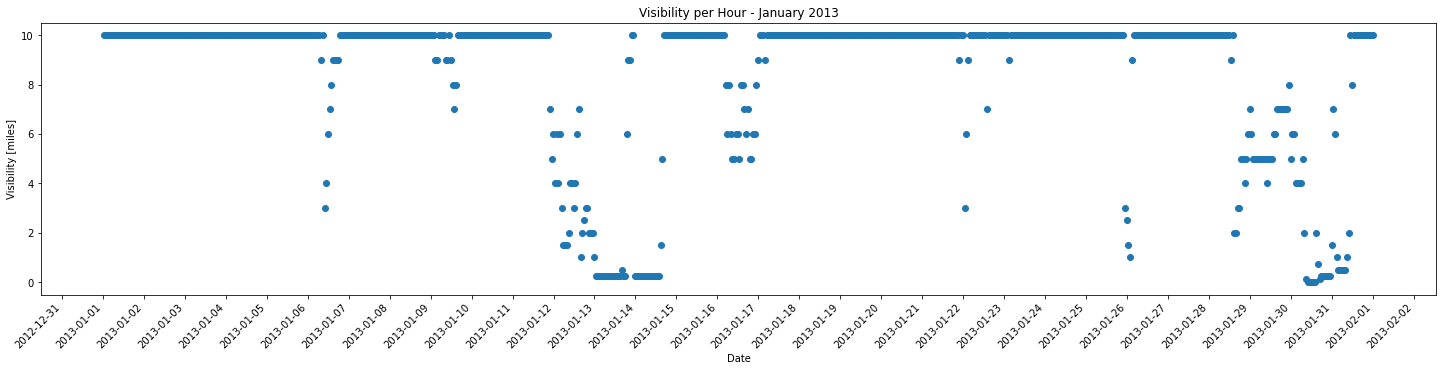

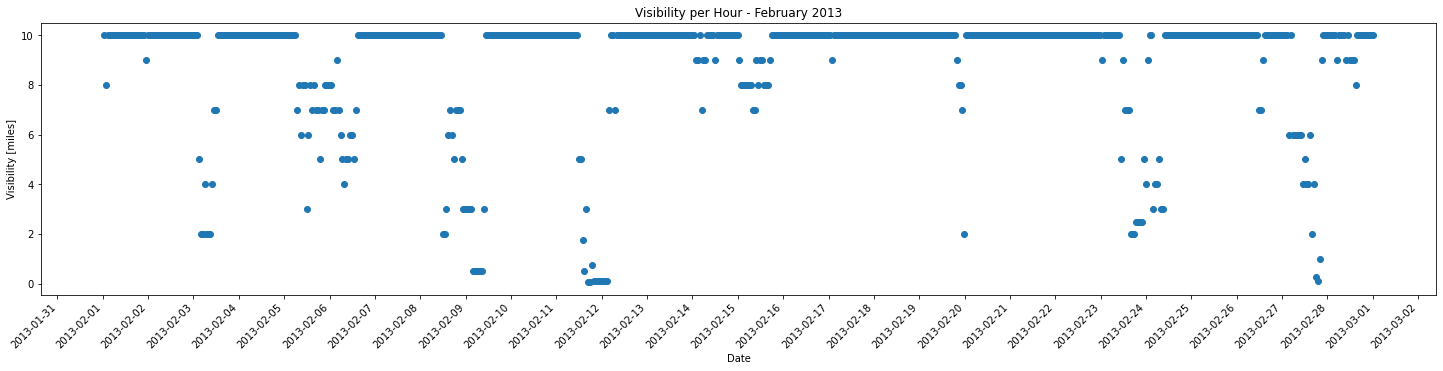

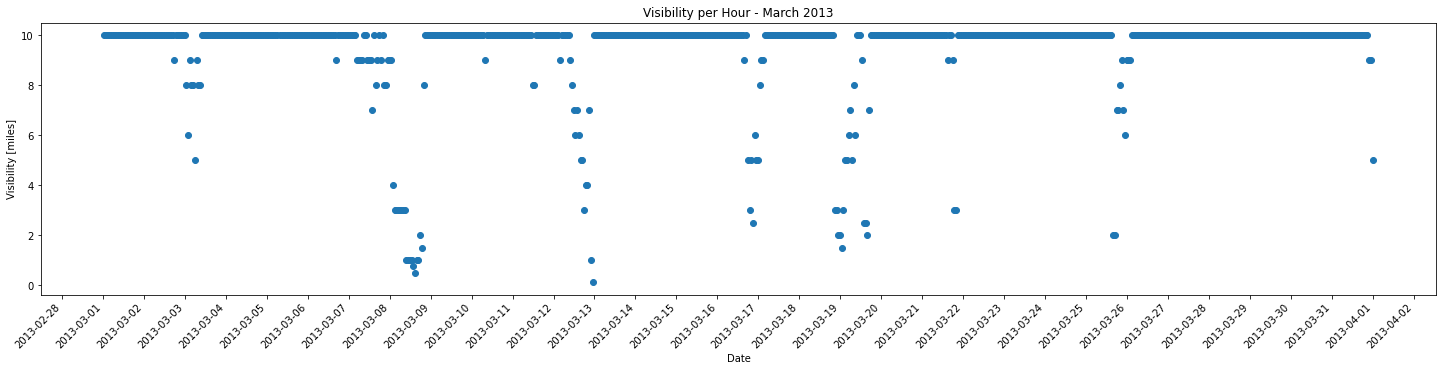

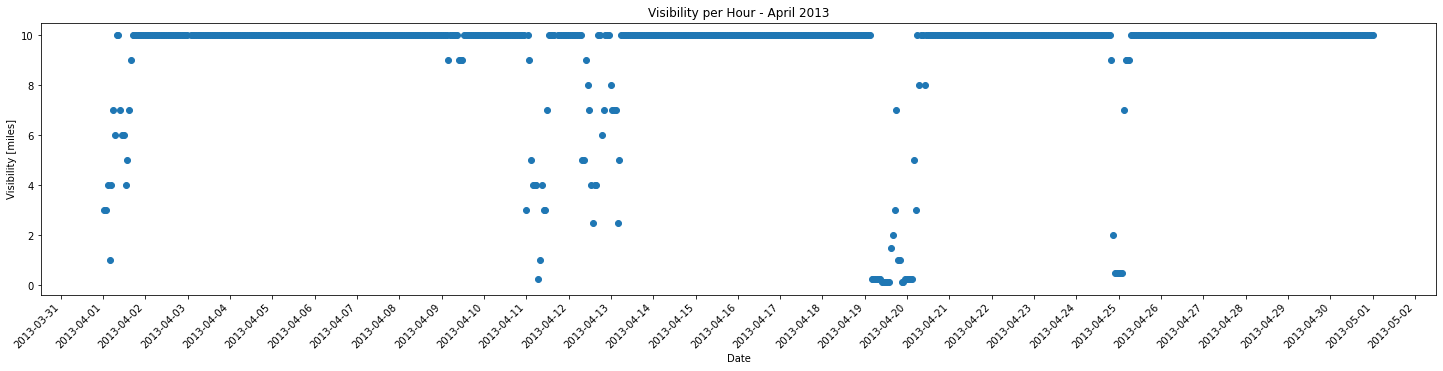

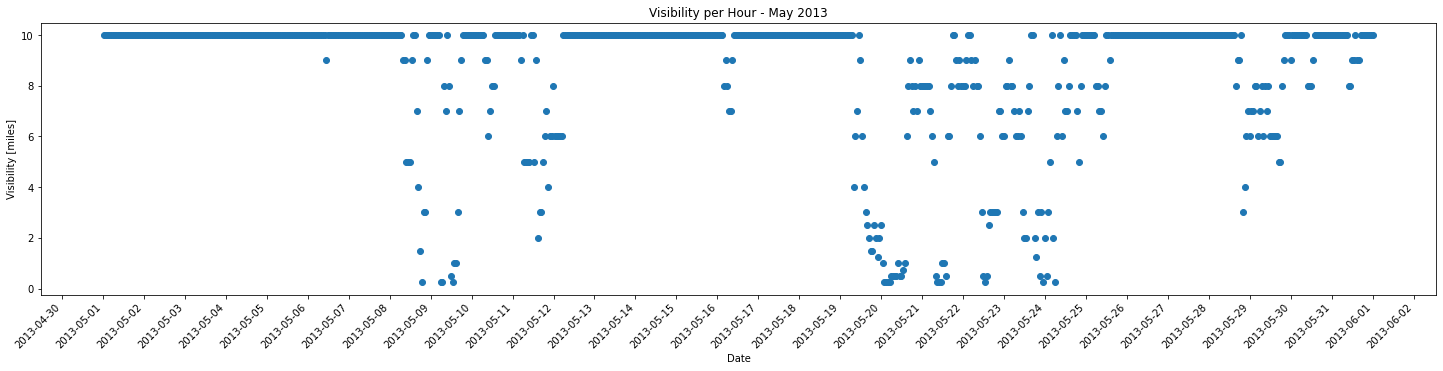

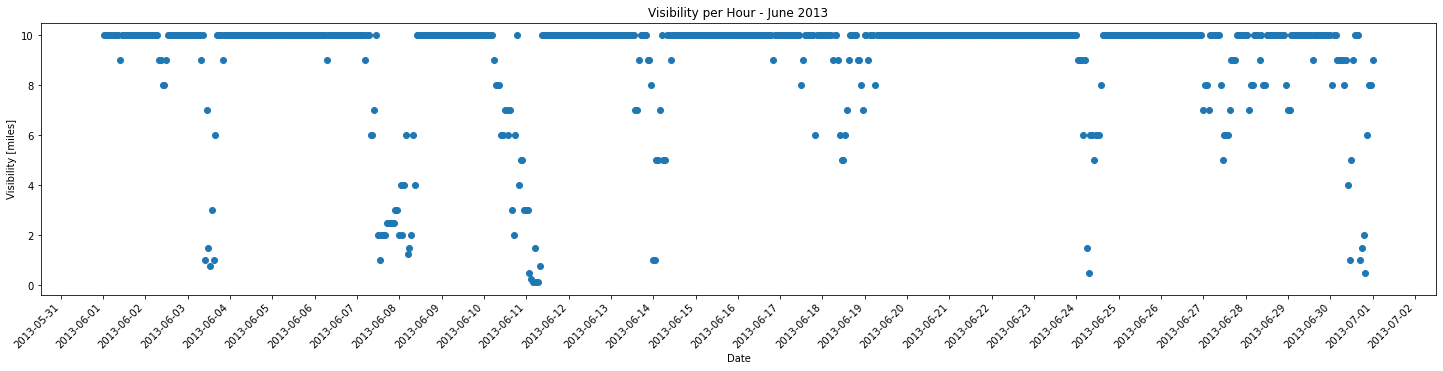

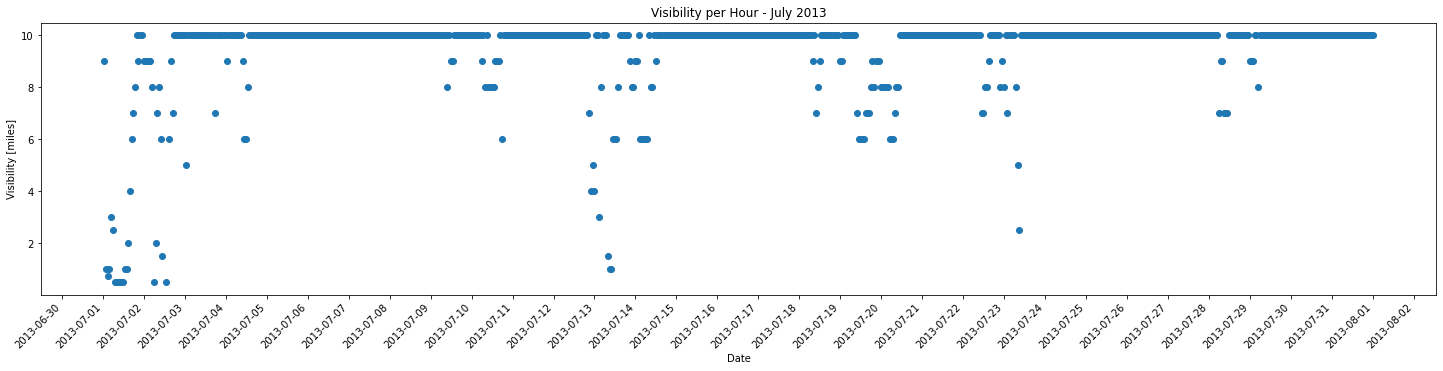

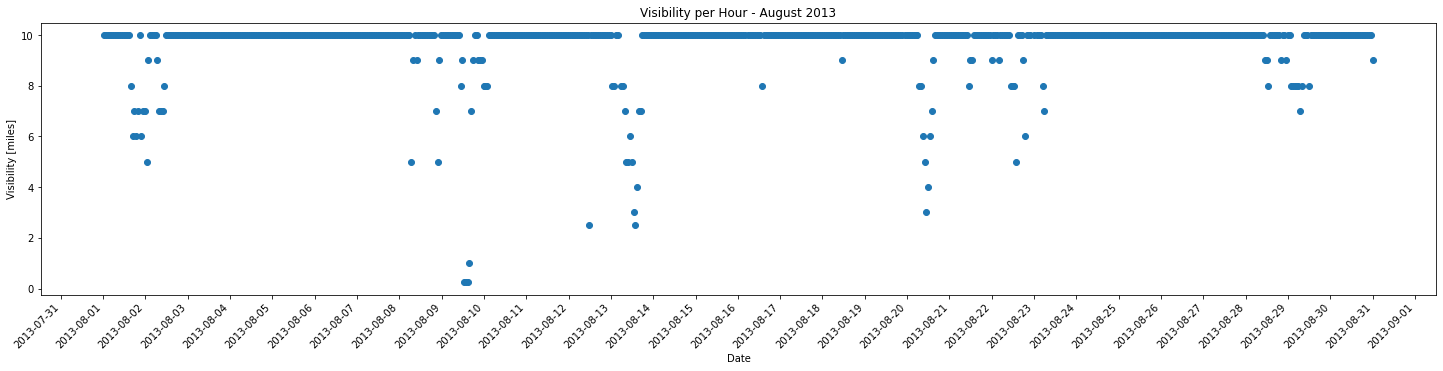

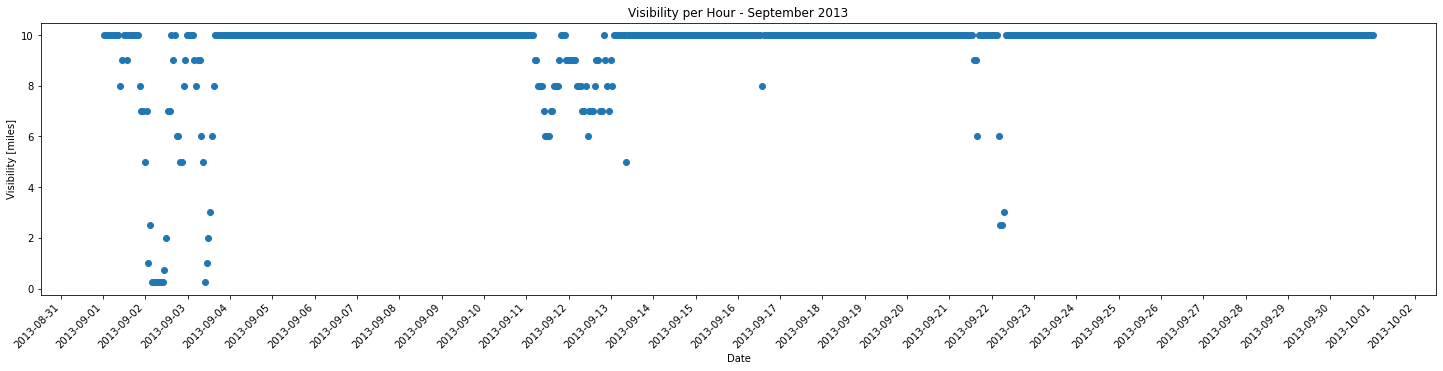

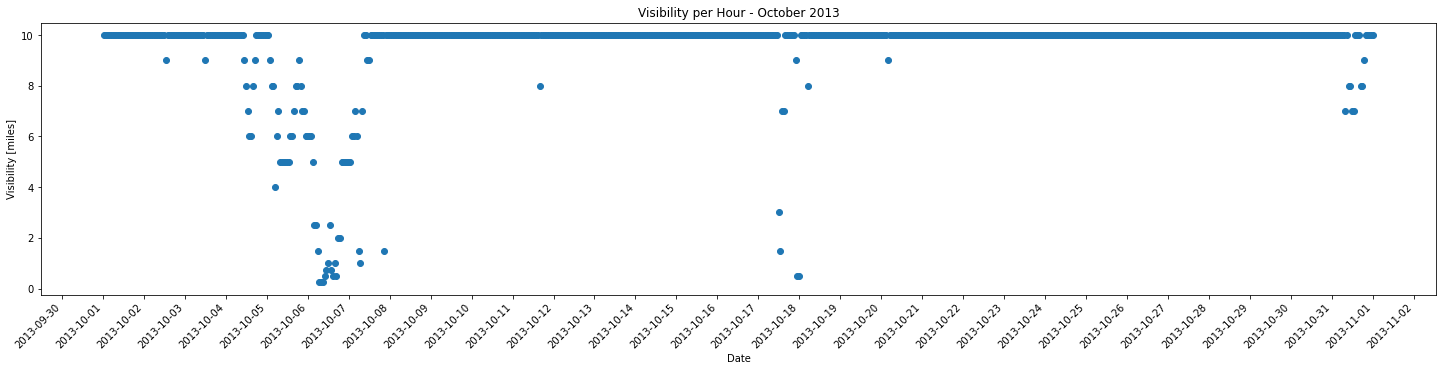

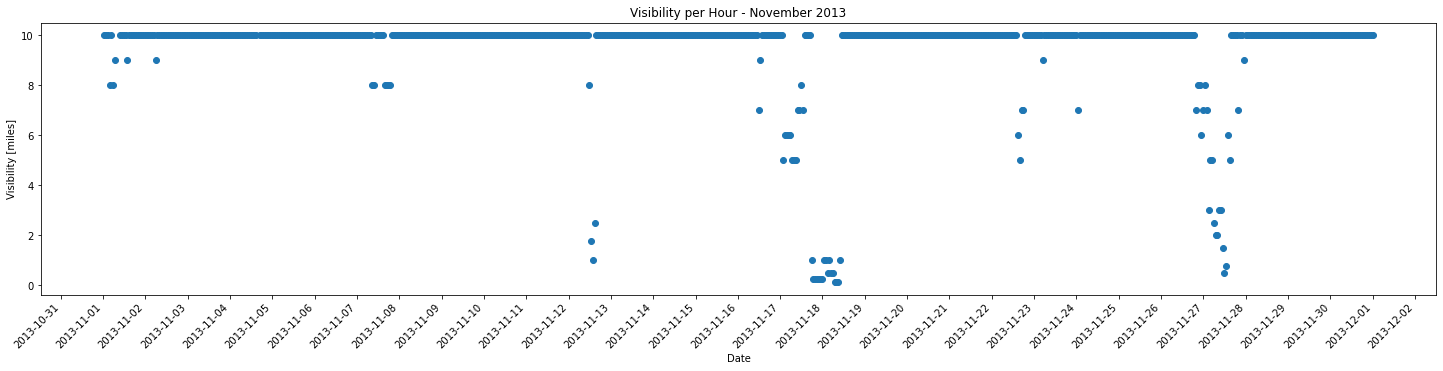

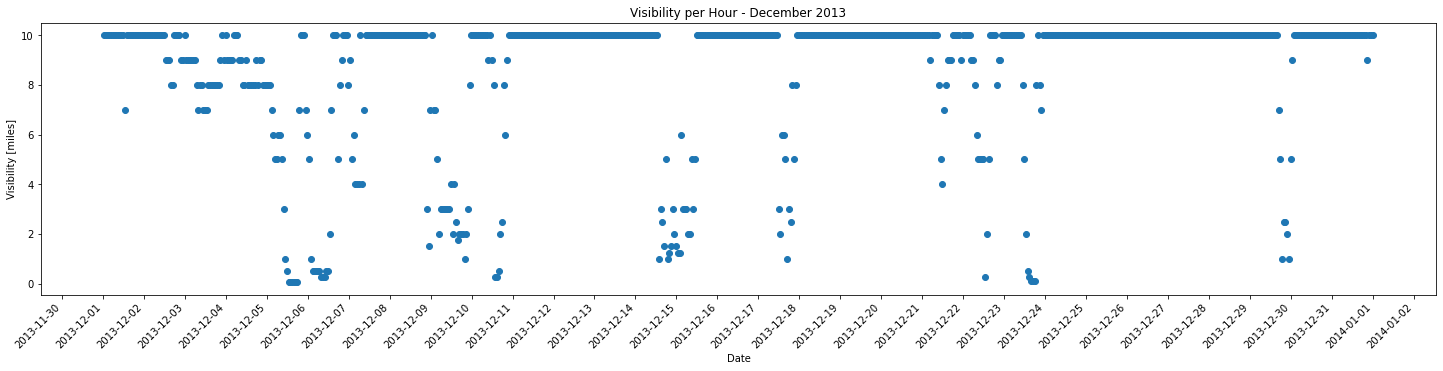

In [7]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Visibility [in miles]'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Visibility [miles]')
    plt.title(f'Visibility per Hour - {month_names[i]} 2013');
    #plt.legend();

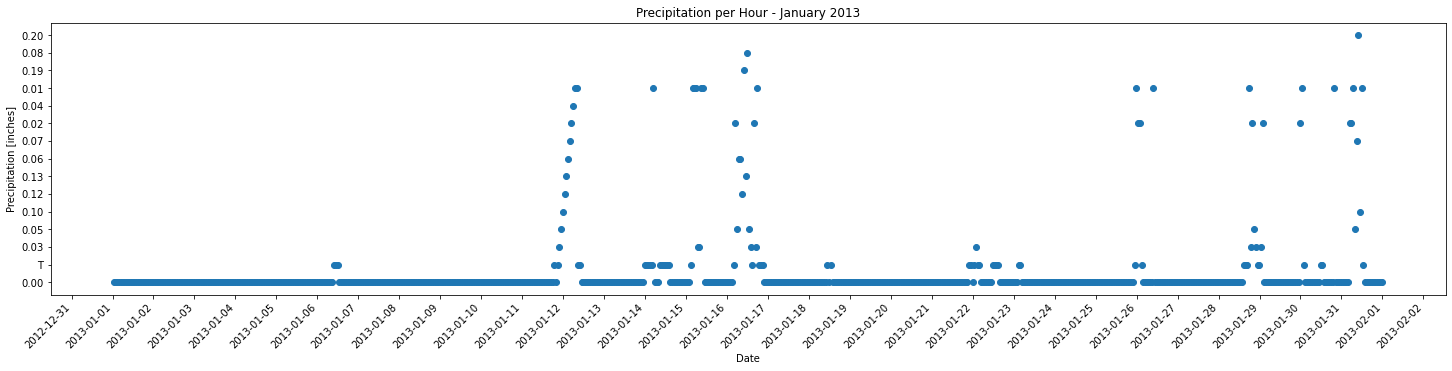

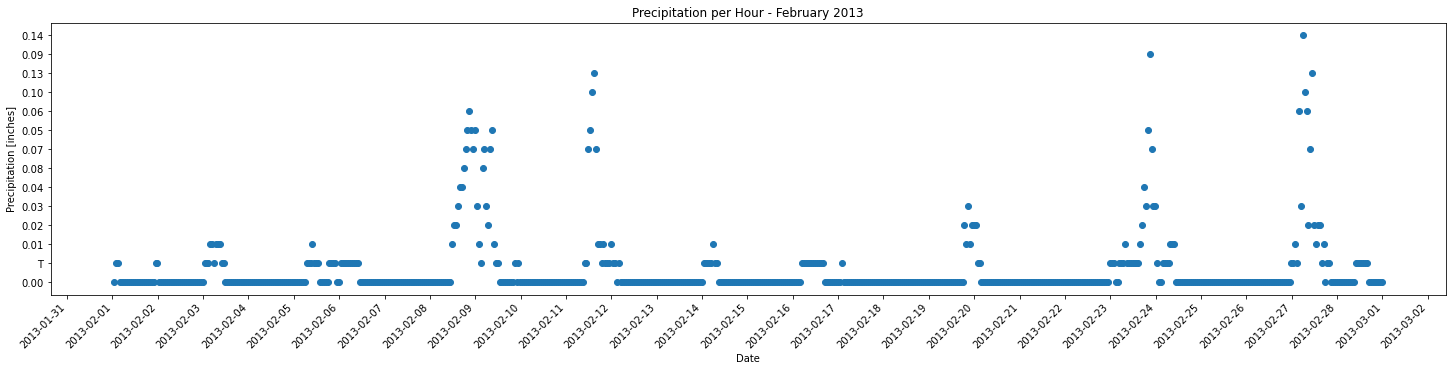

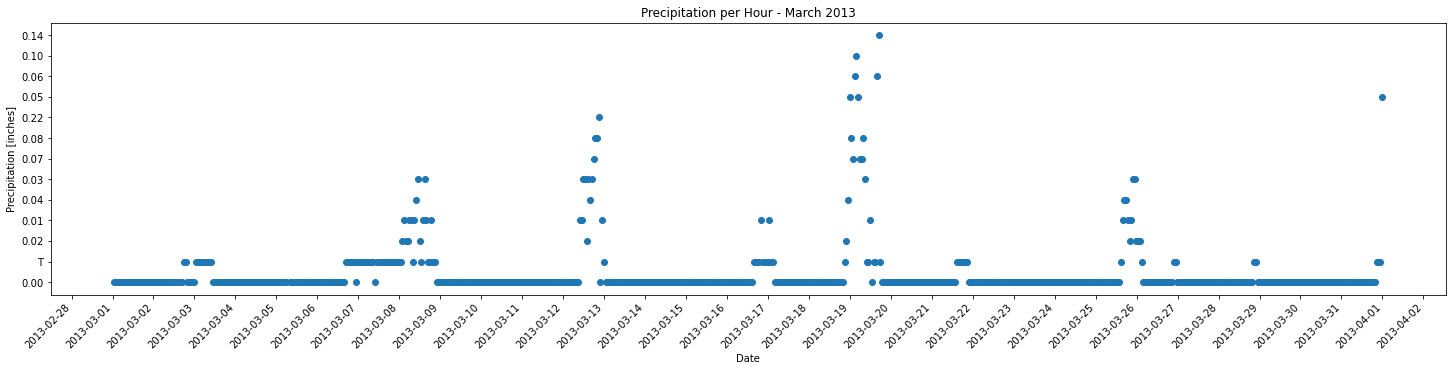

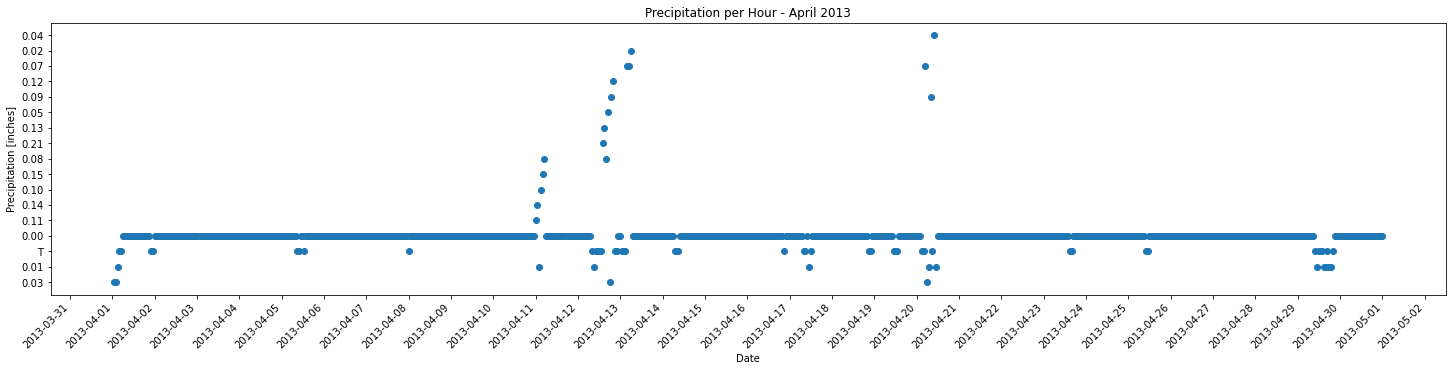

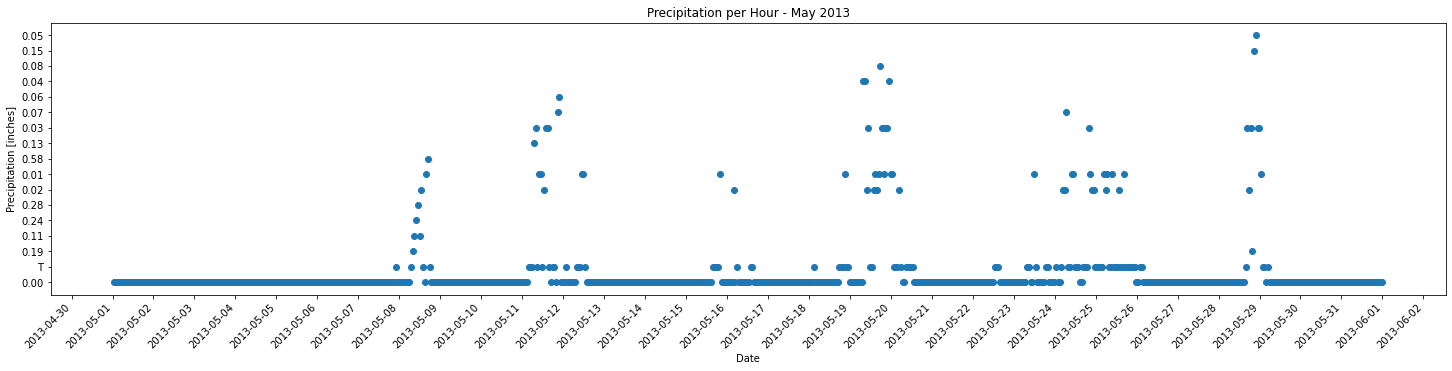

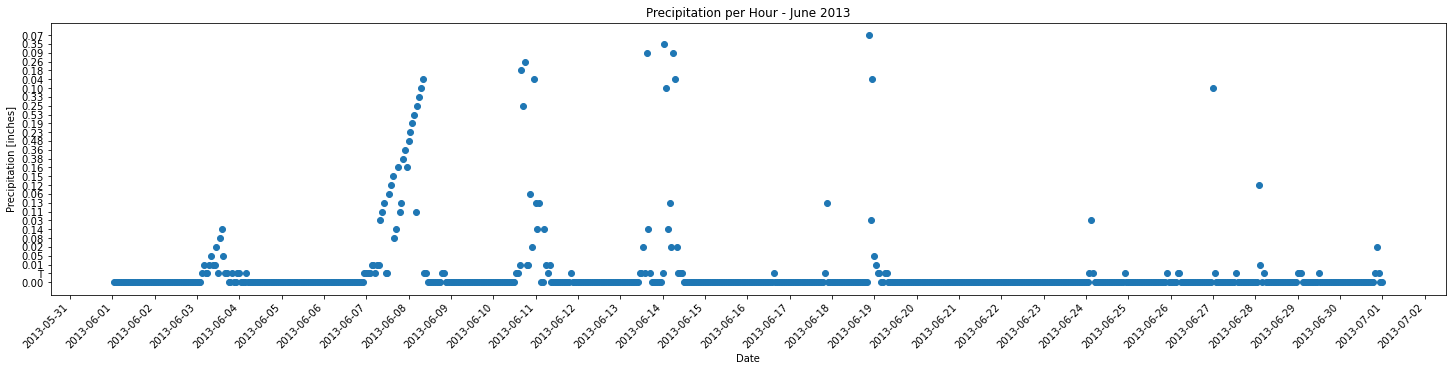

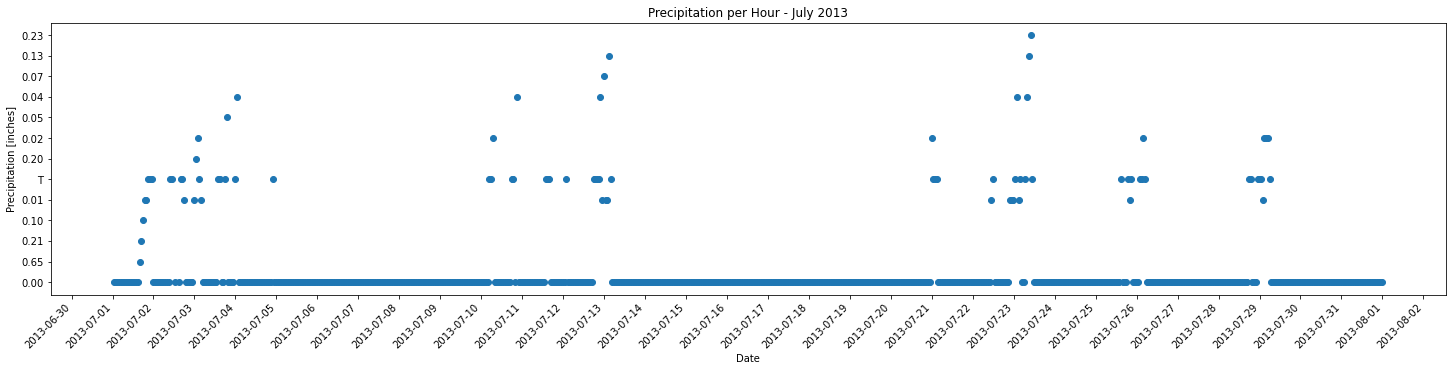

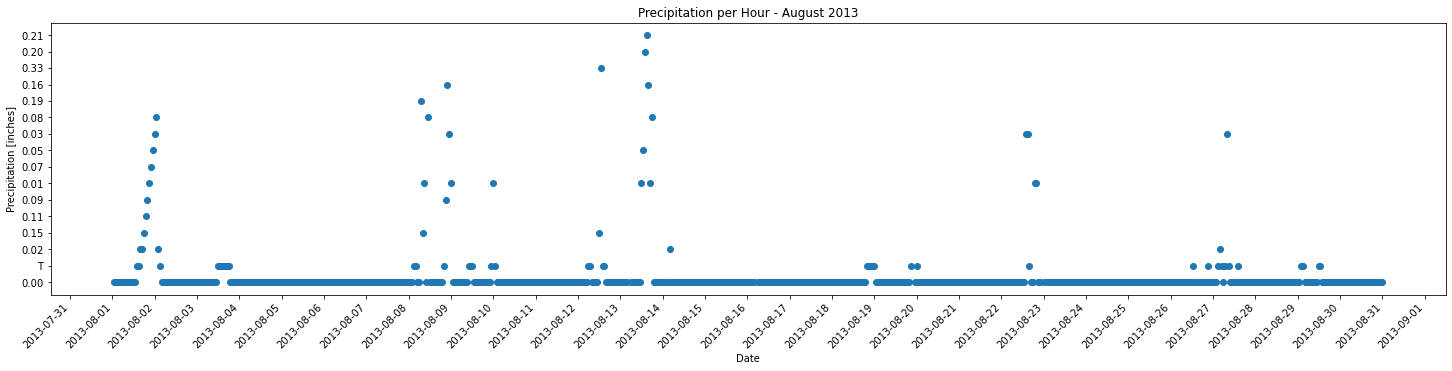

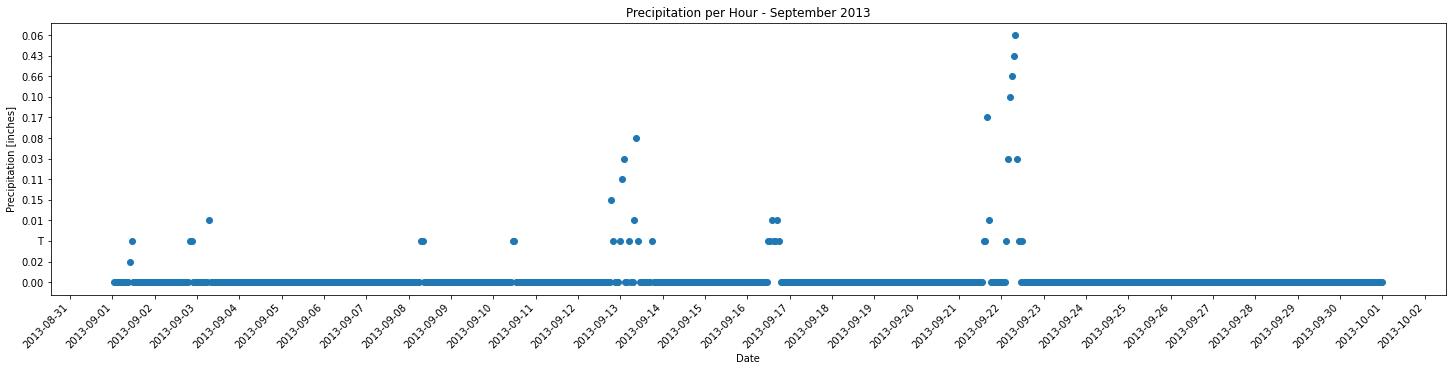

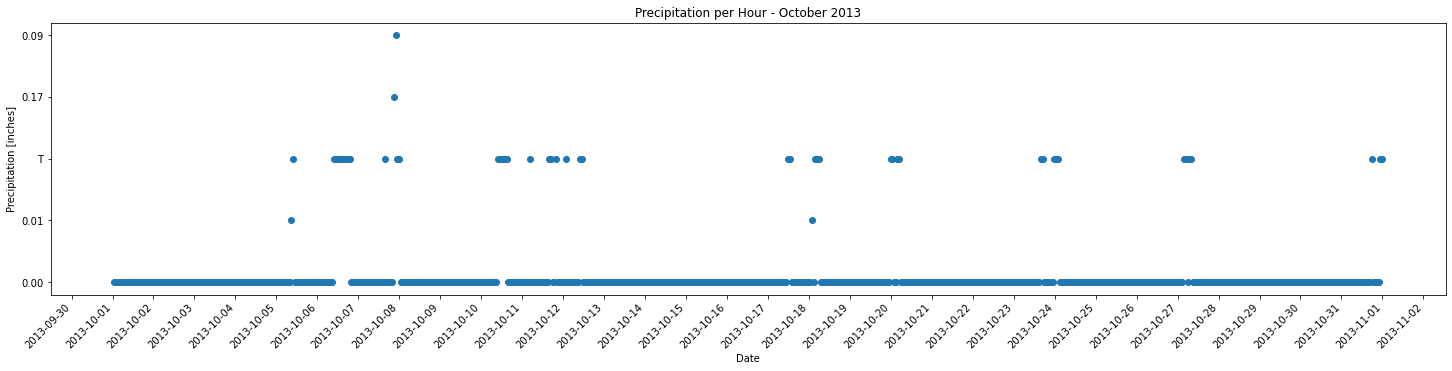

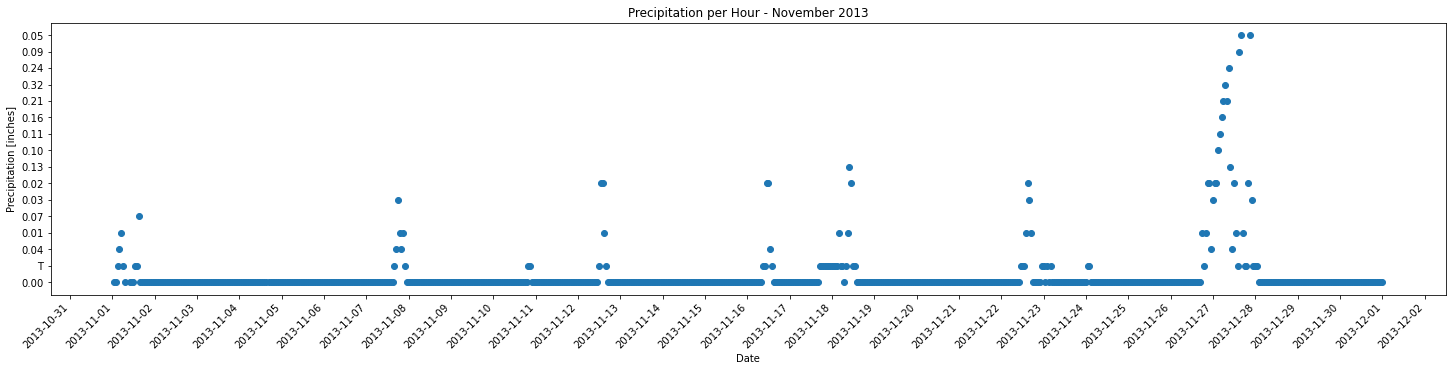

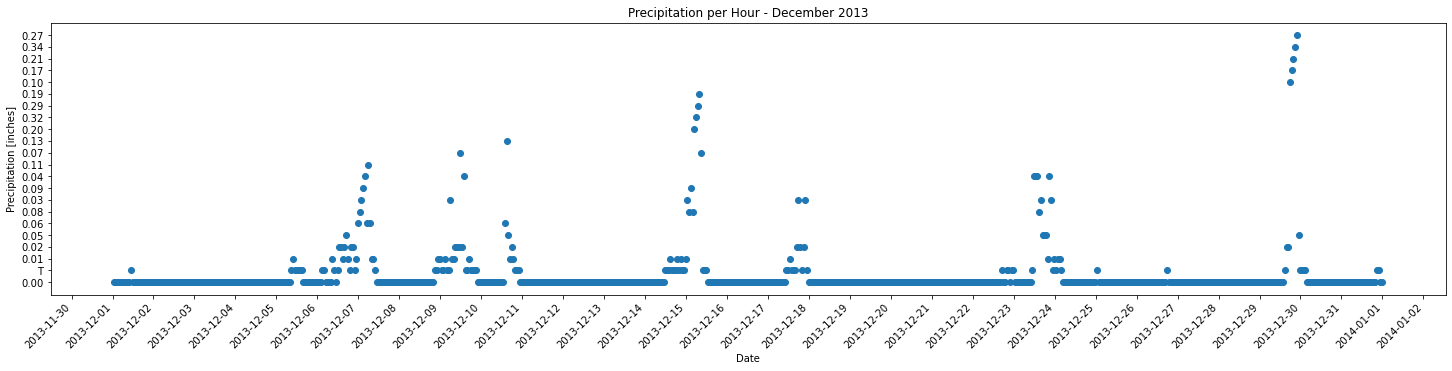

In [8]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['One hour precipitation [in inches]'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    #plt.ylim(-0.01, 0.3)

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Precipitation [inches]')
    plt.title(f'Precipitation per Hour - {month_names[i]} 2013');
    #plt.legend();

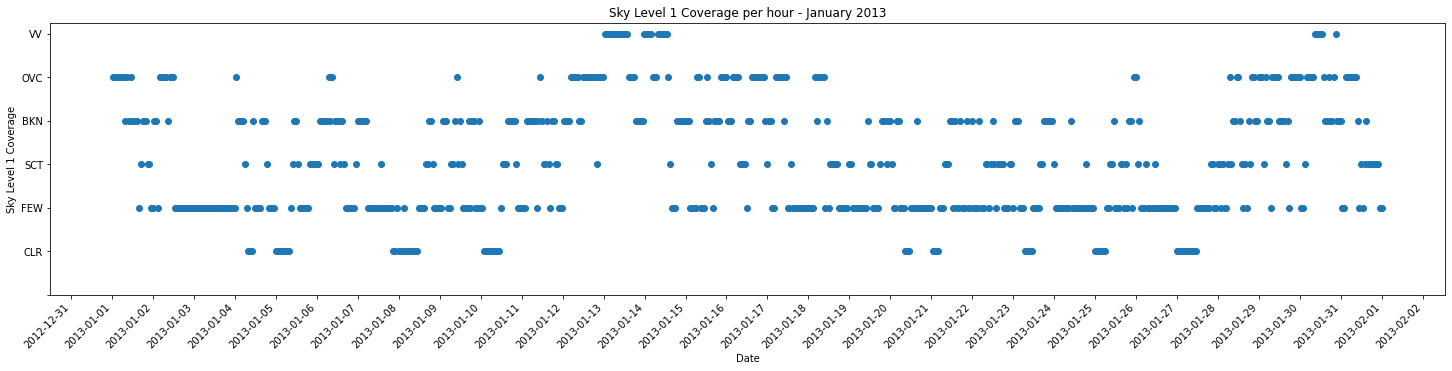

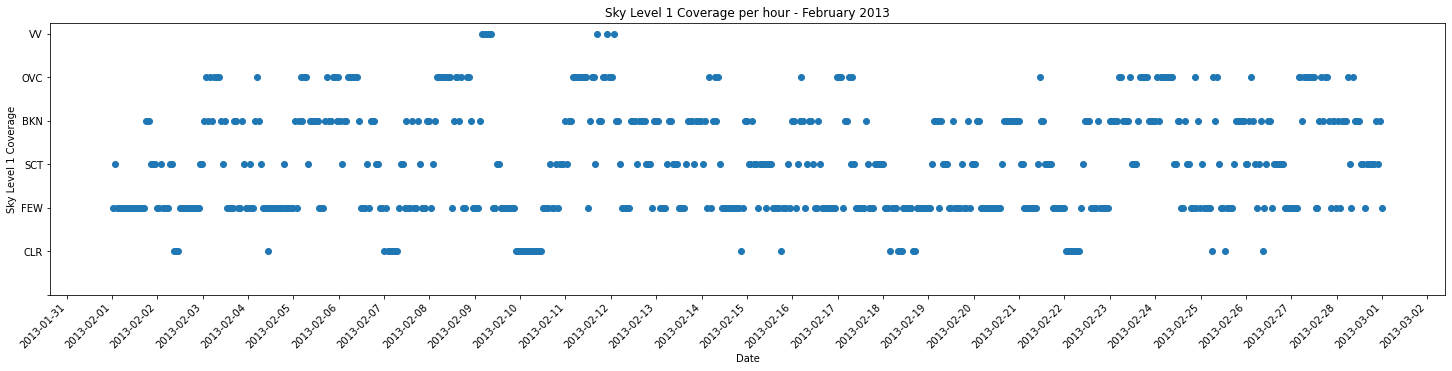

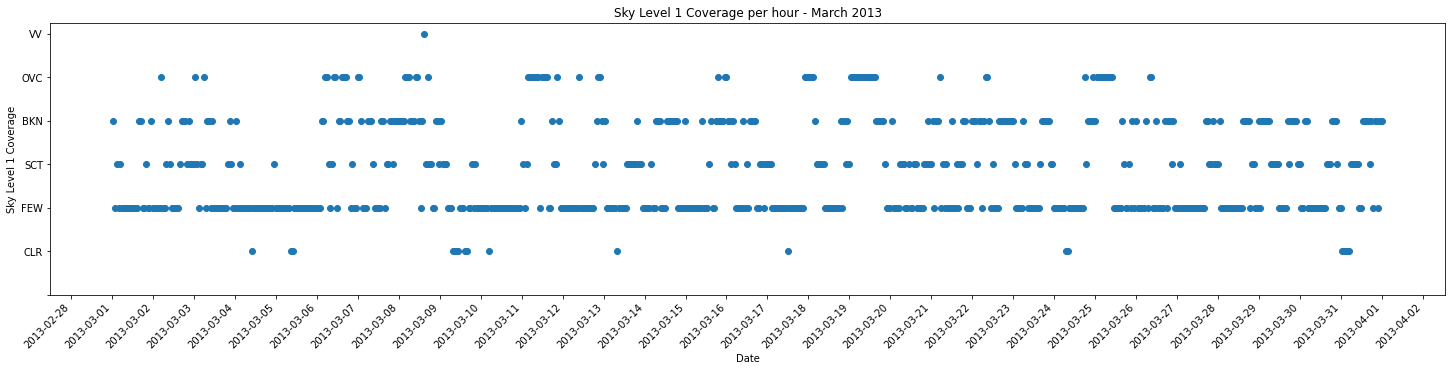

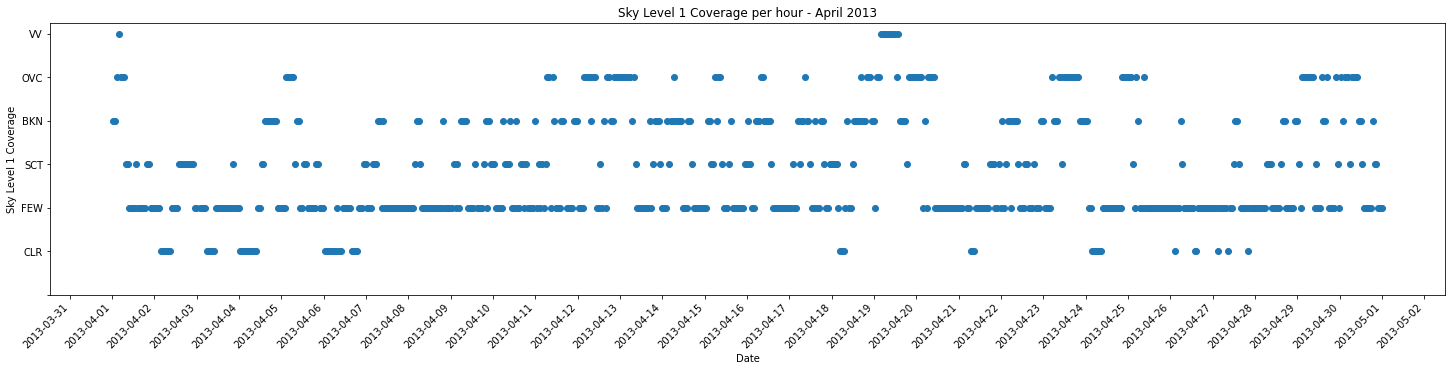

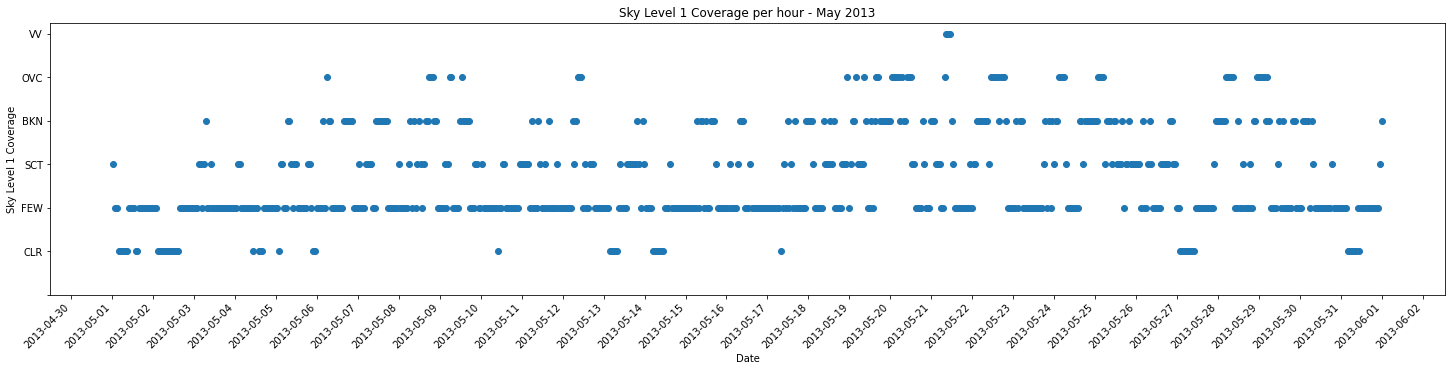

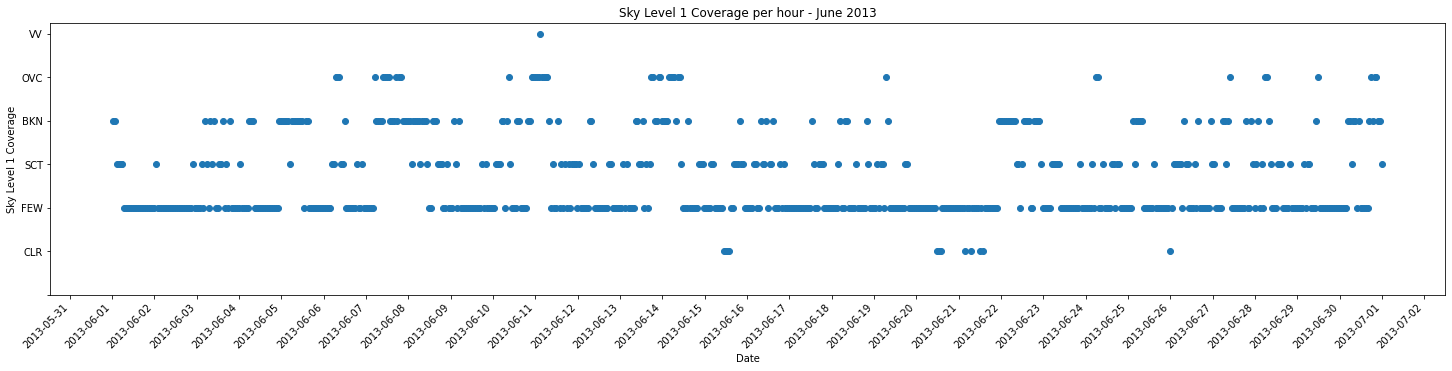

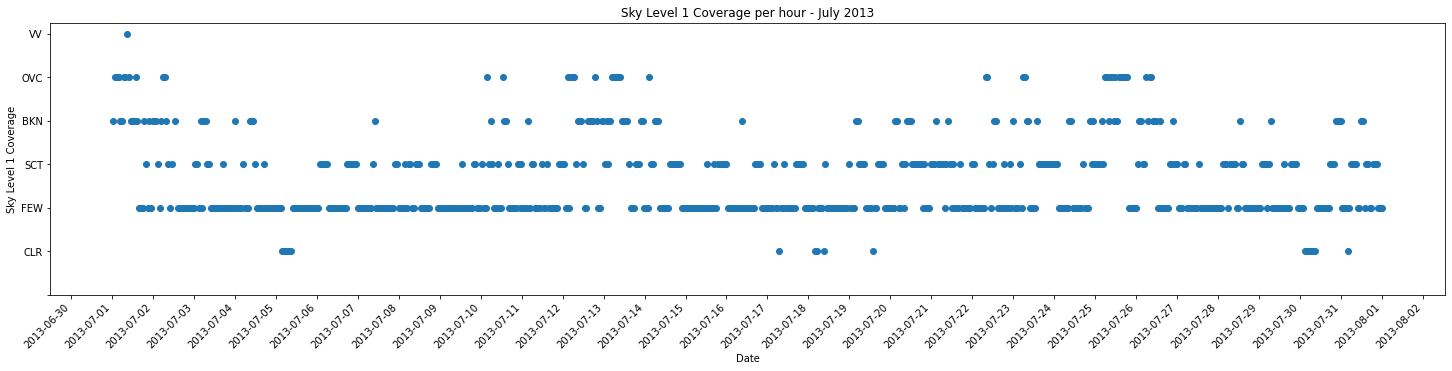

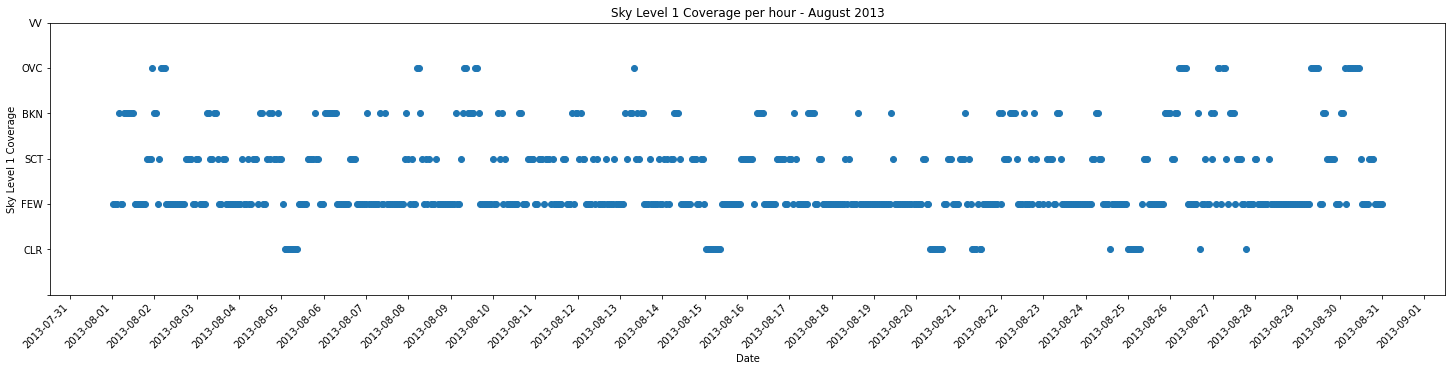

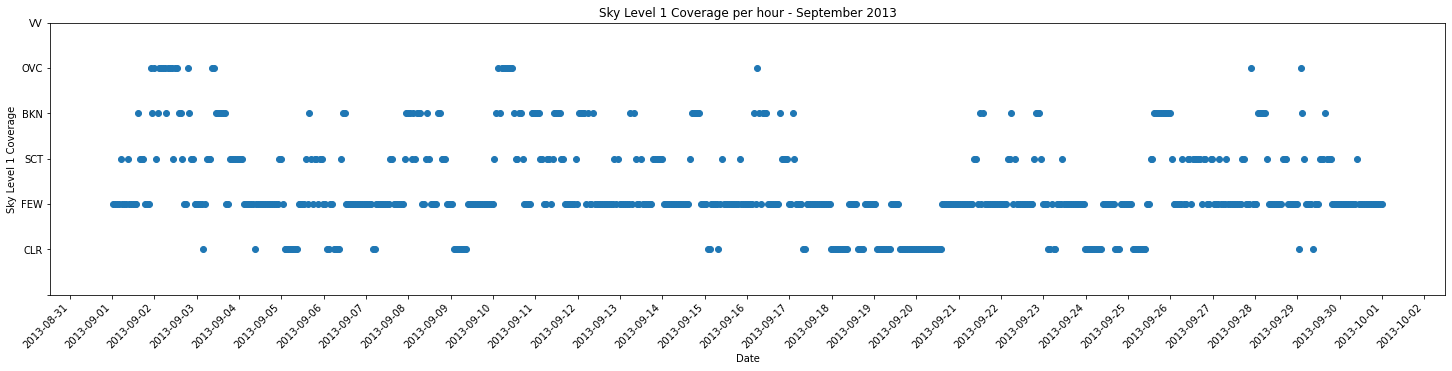

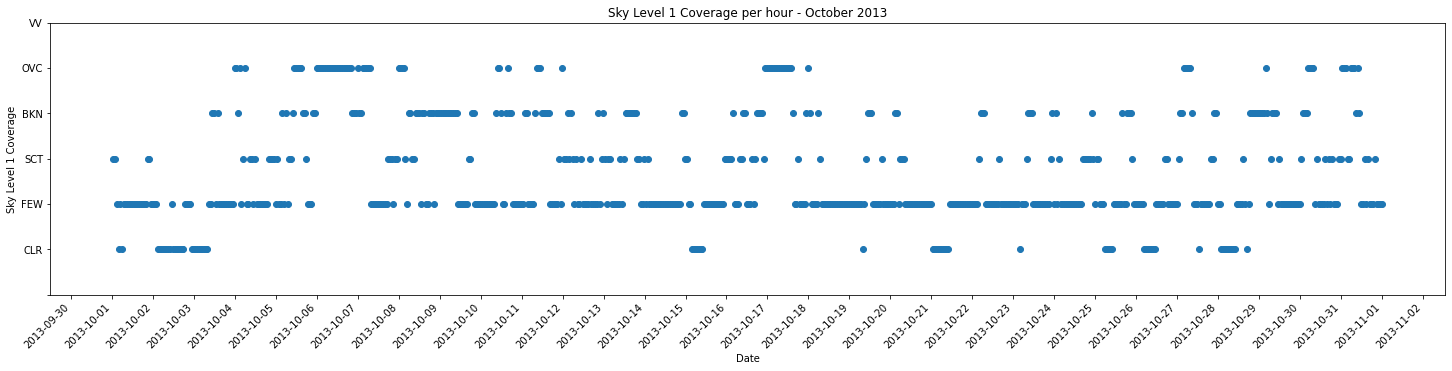

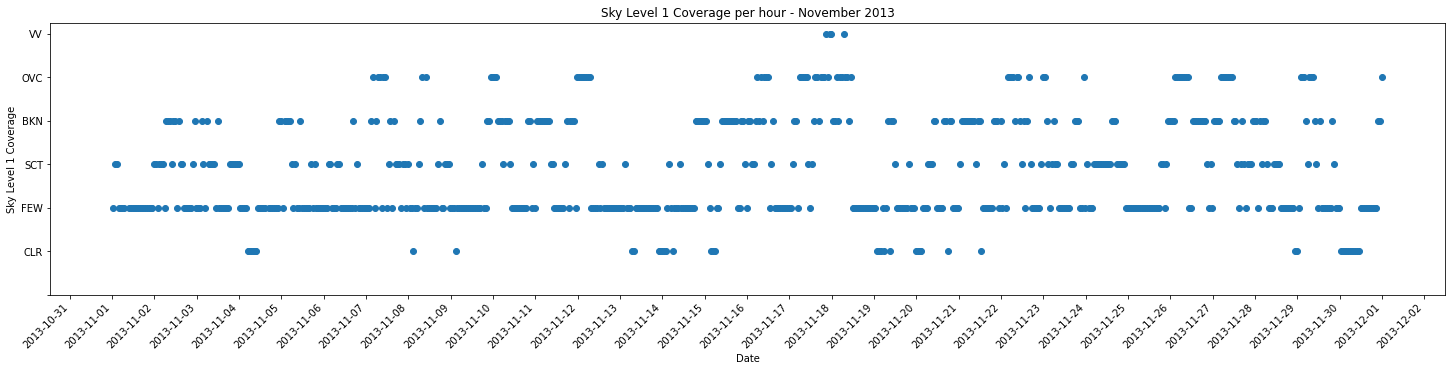

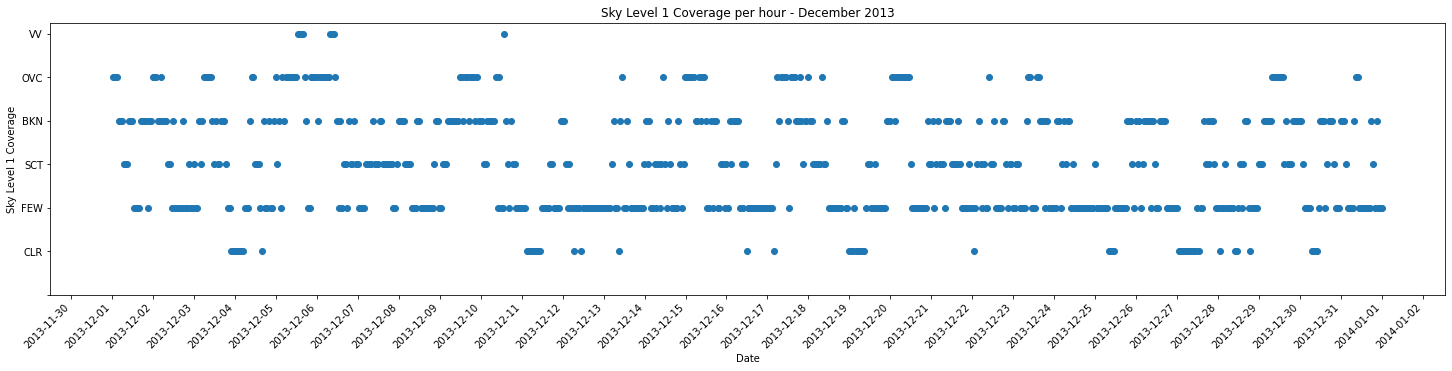

In [9]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Sky Level 1 Coverage'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.yticks(ticks=range(len([' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])),
           labels=[' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Sky Level 1 Coverage')
    plt.title(f'Sky Level 1 Coverage per hour - {month_names[i]} 2013');
    #plt.legend();

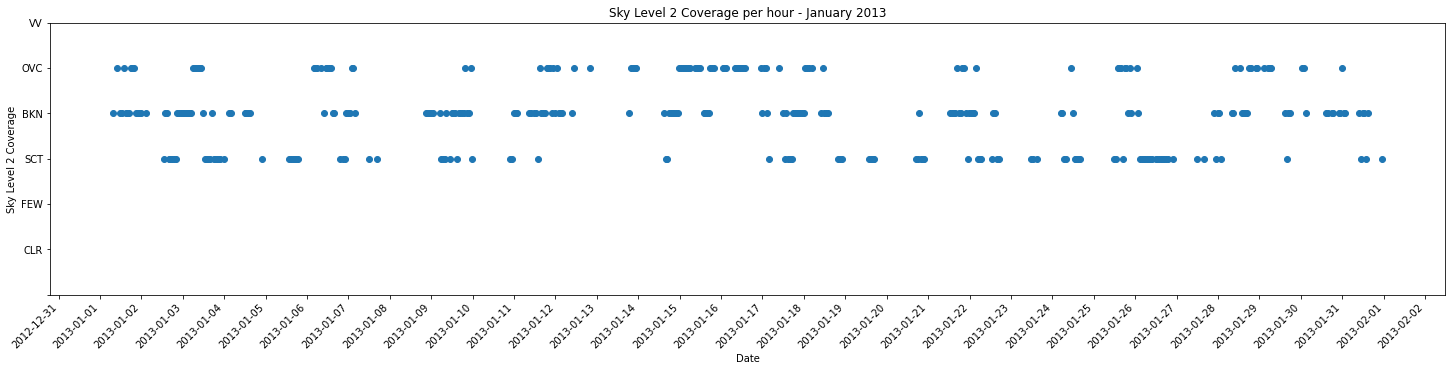

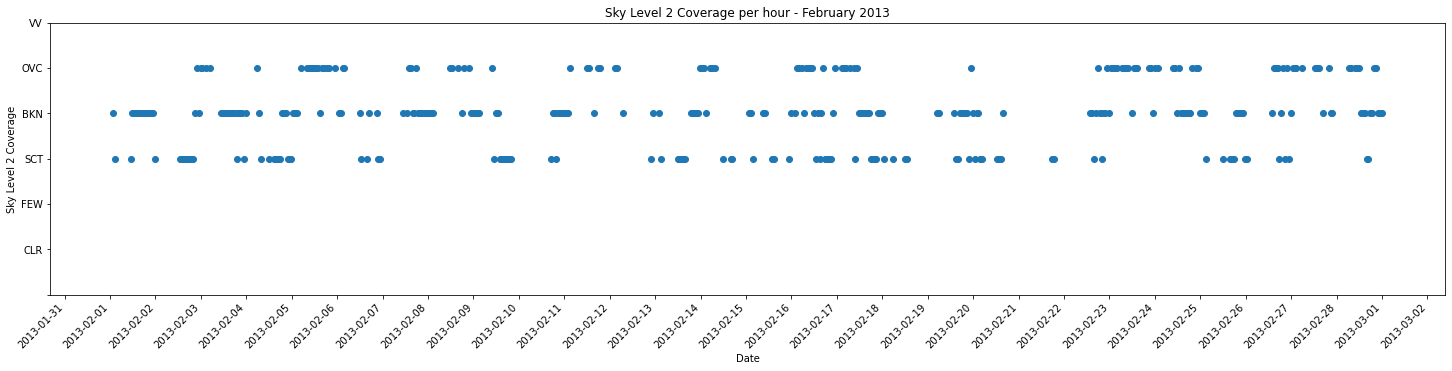

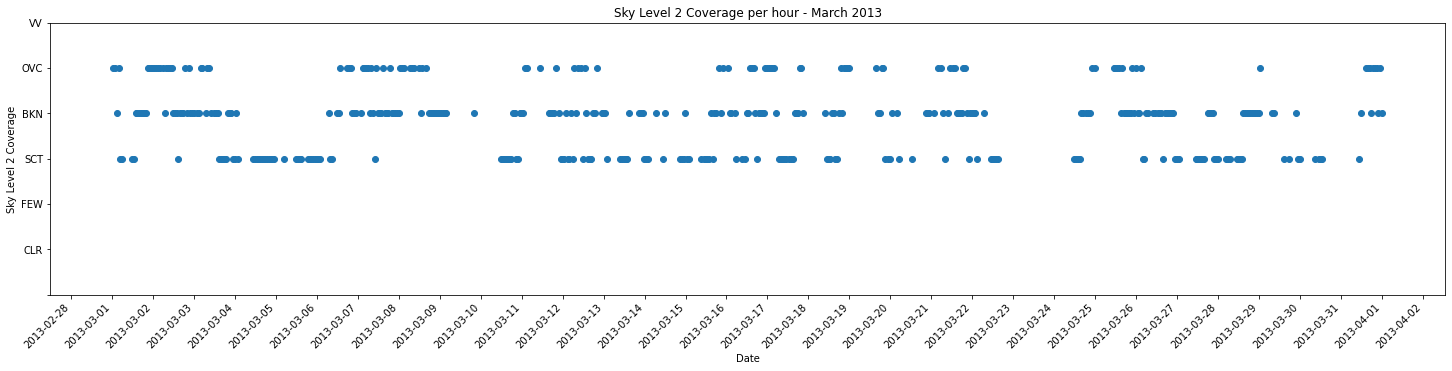

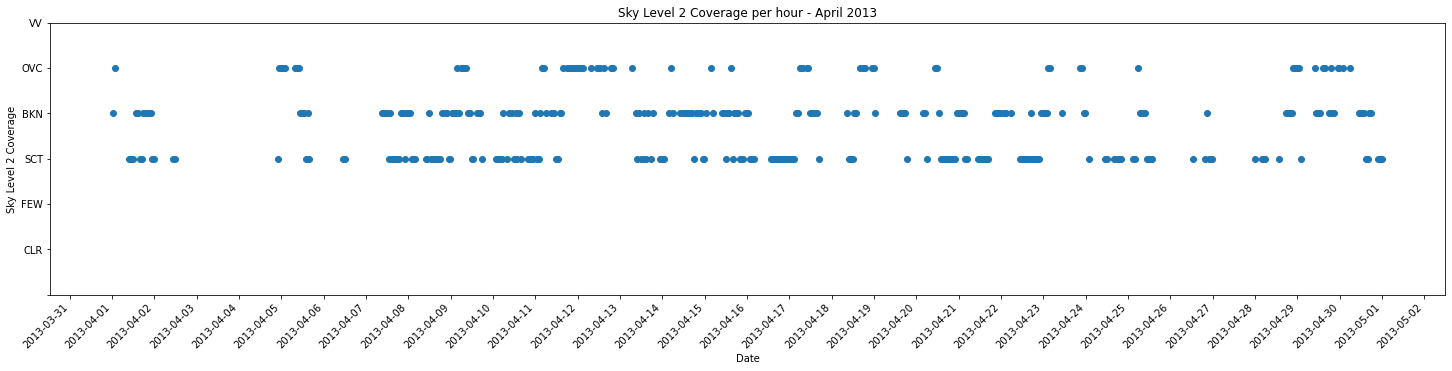

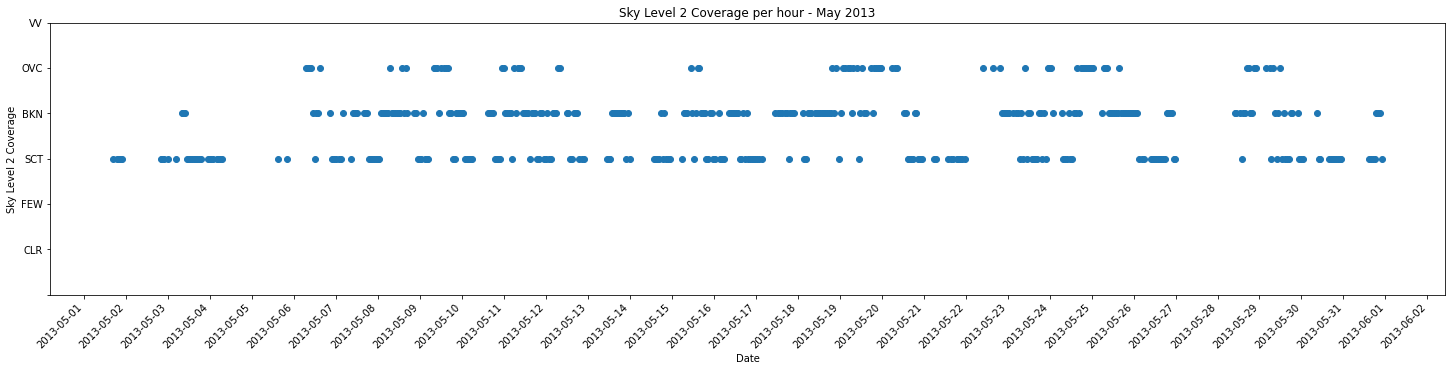

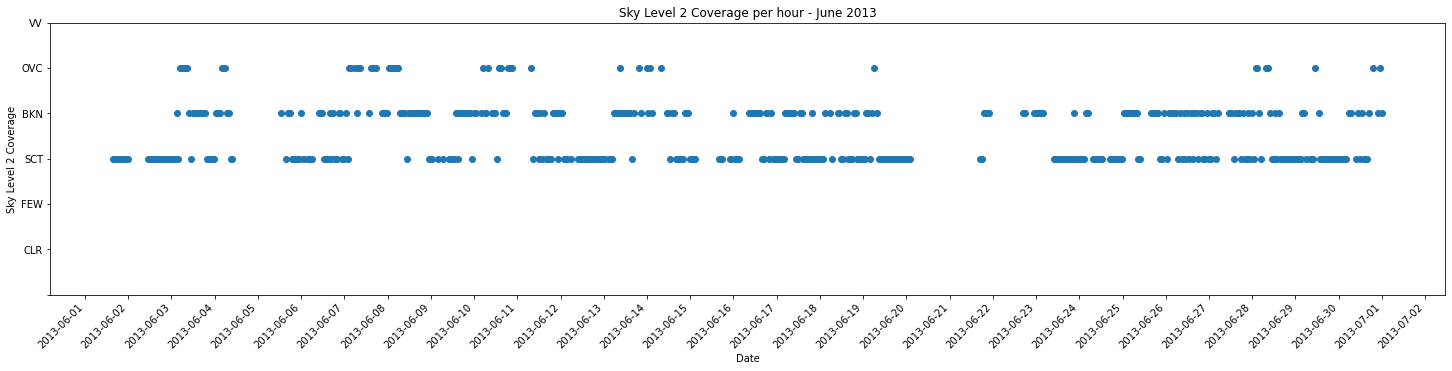

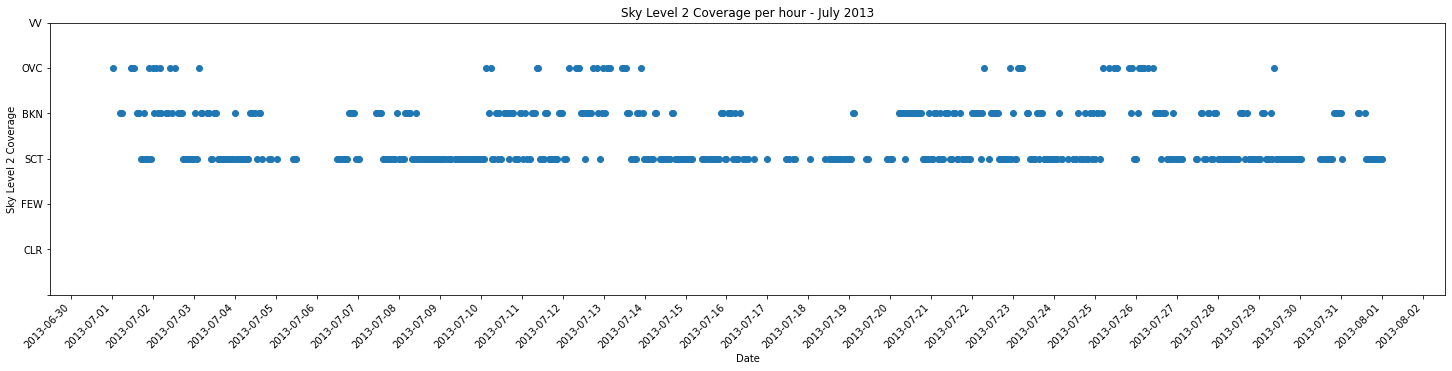

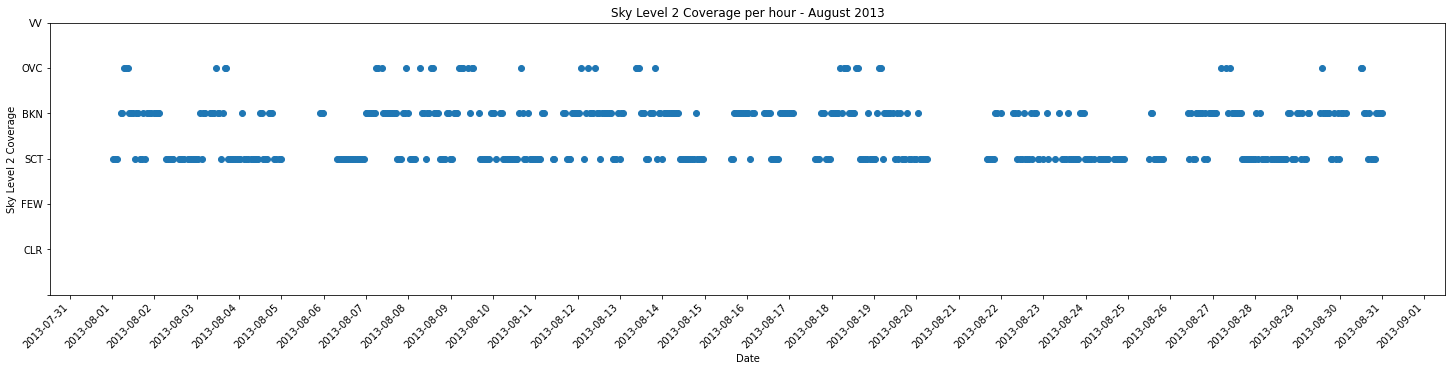

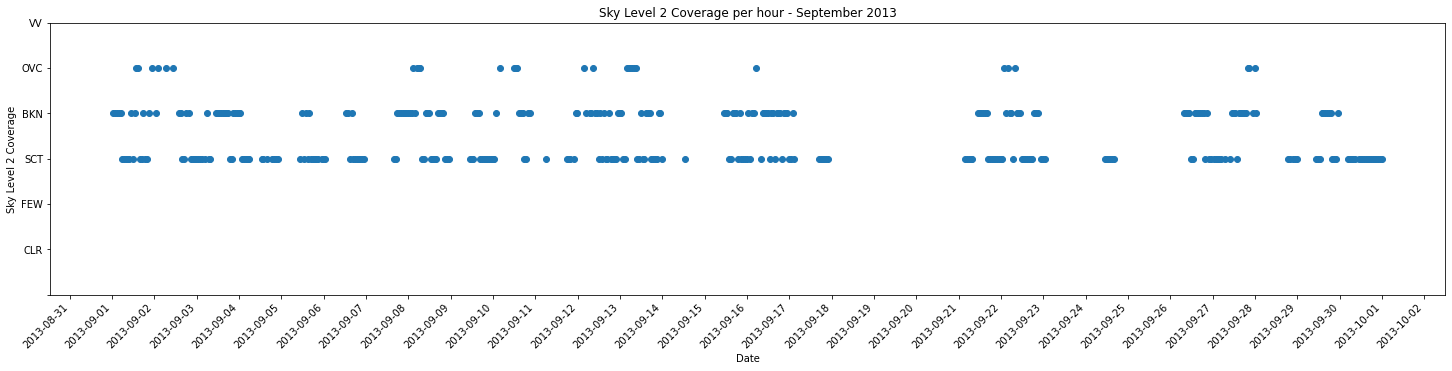

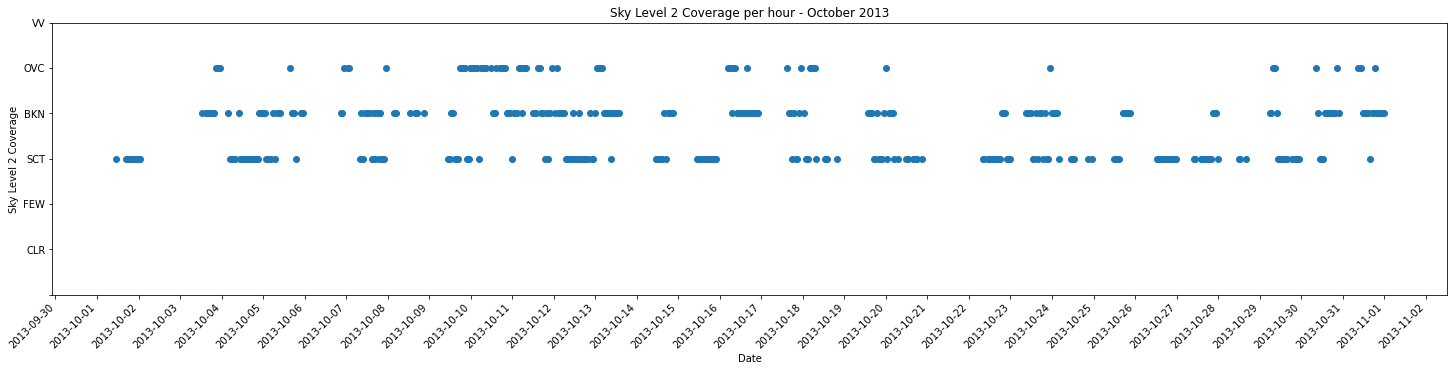

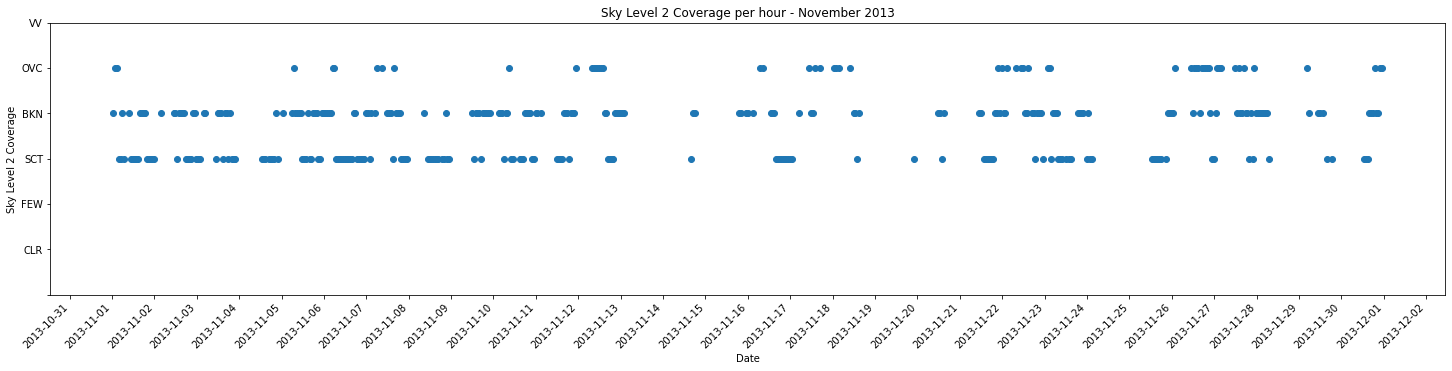

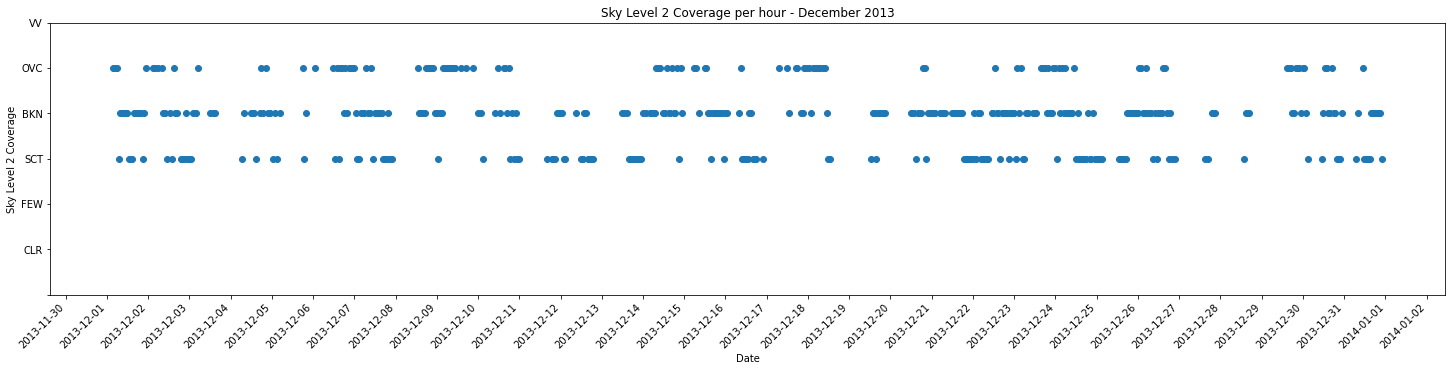

In [10]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Sky Level 2 Coverage'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.yticks(ticks=range(len([' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])),
           labels=[' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Sky Level 2 Coverage')
    plt.title(f'Sky Level 2 Coverage per hour - {month_names[i]} 2013');
    #plt.legend();

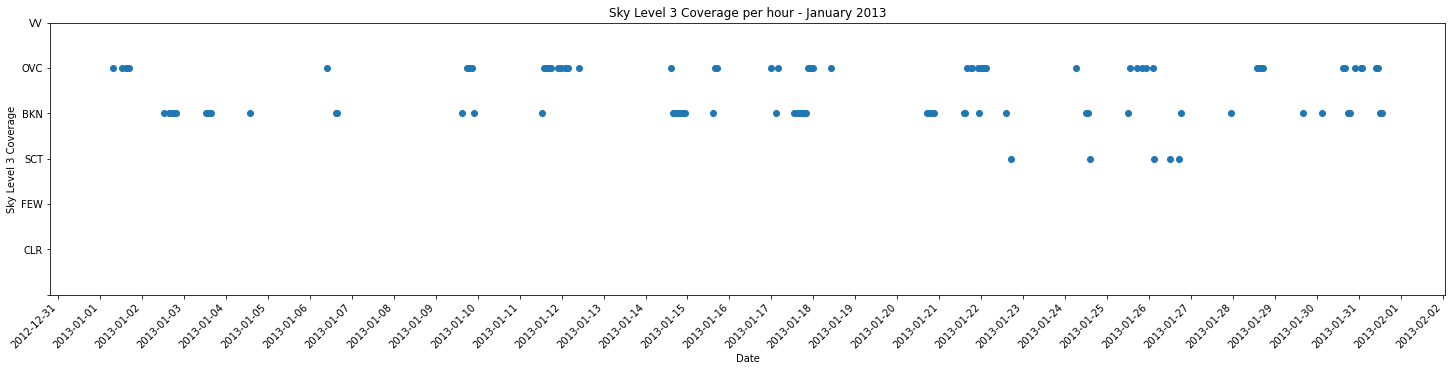

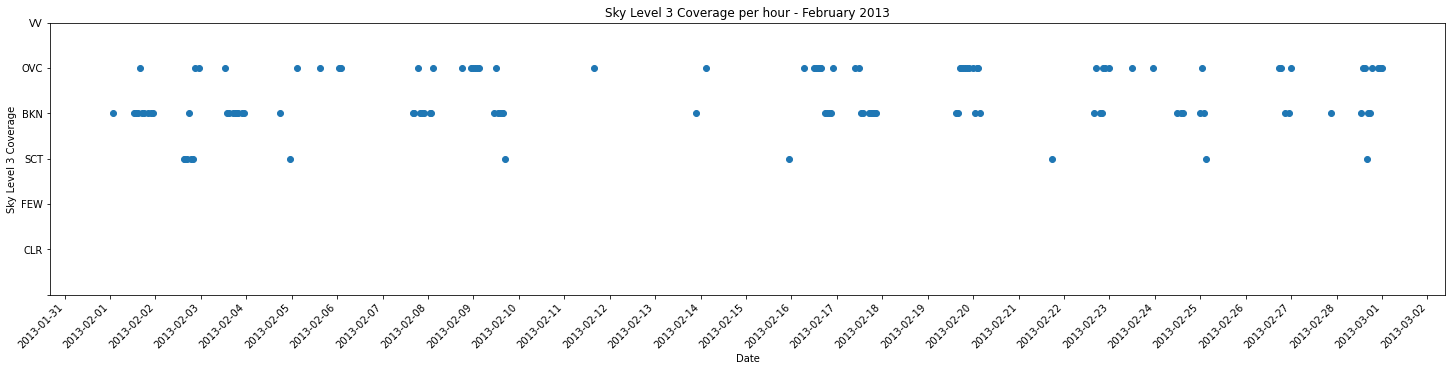

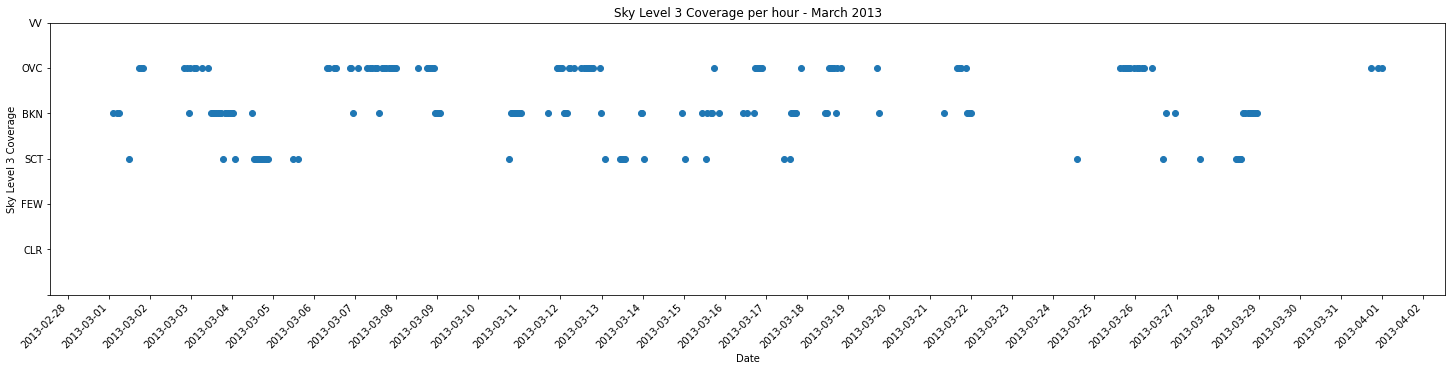

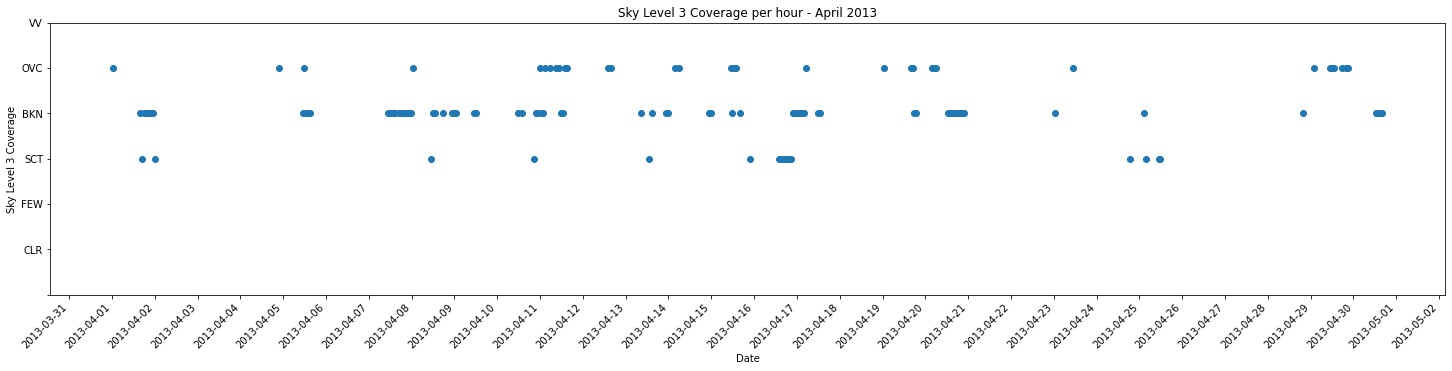

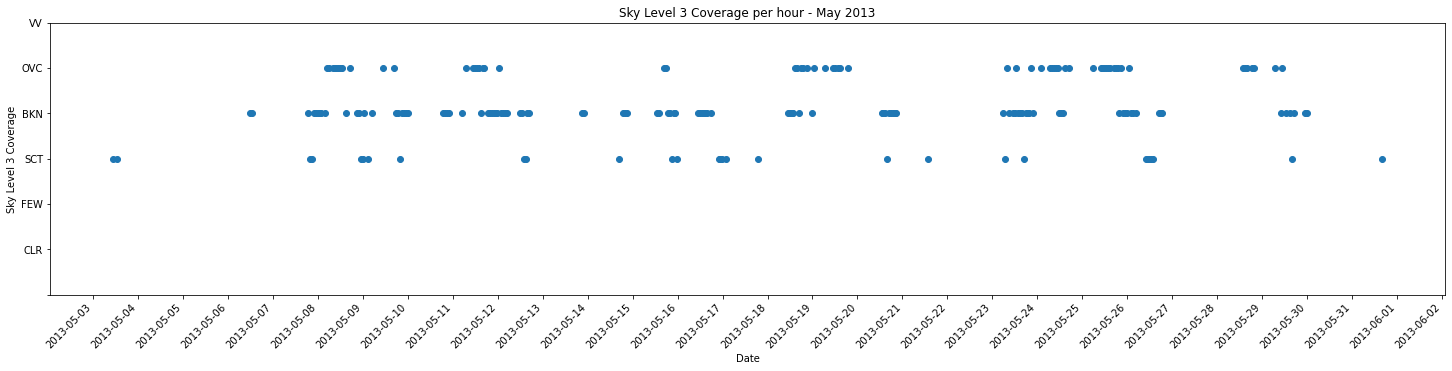

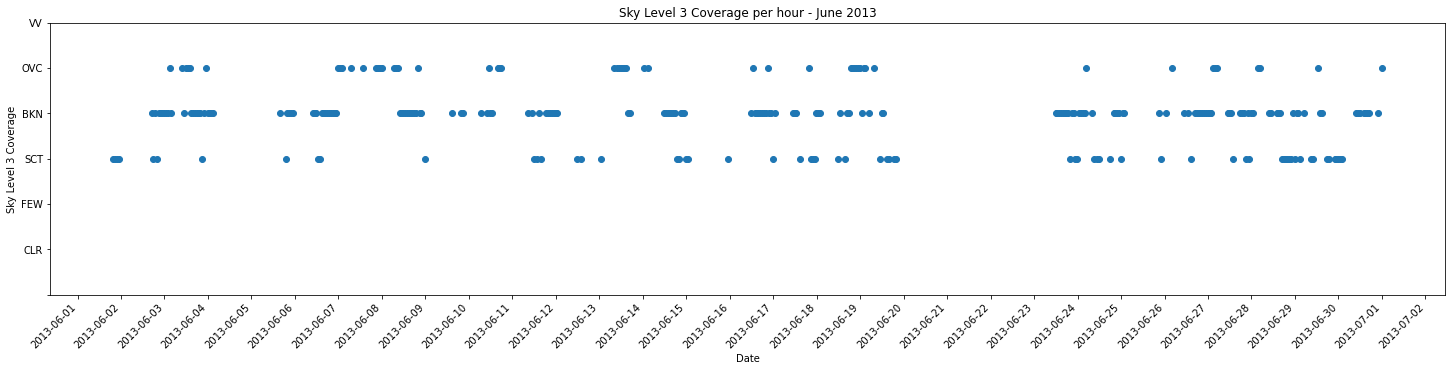

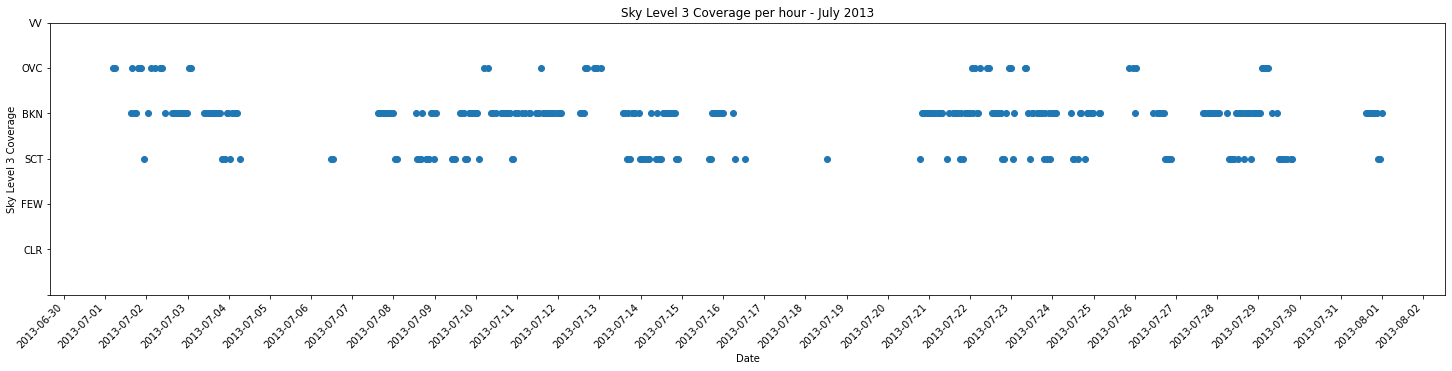

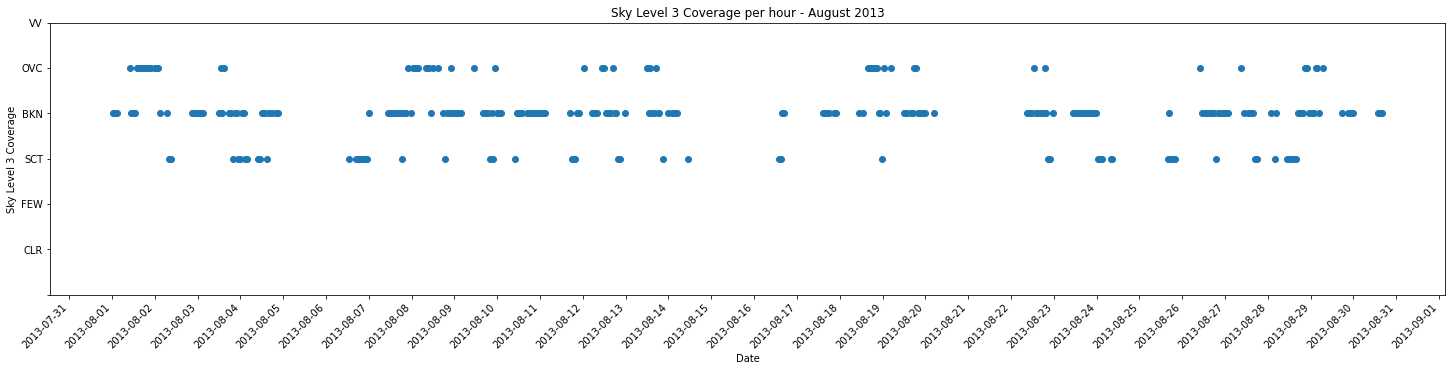

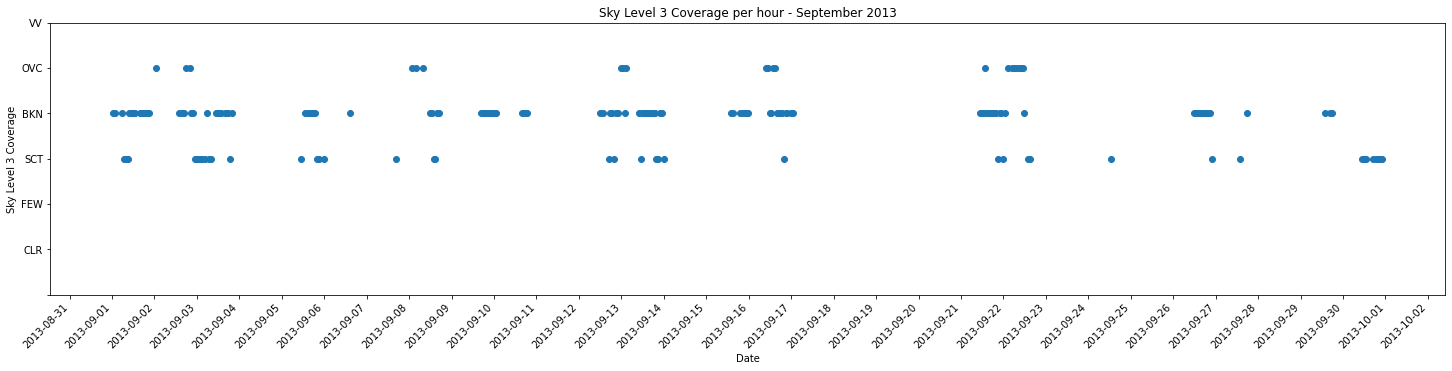

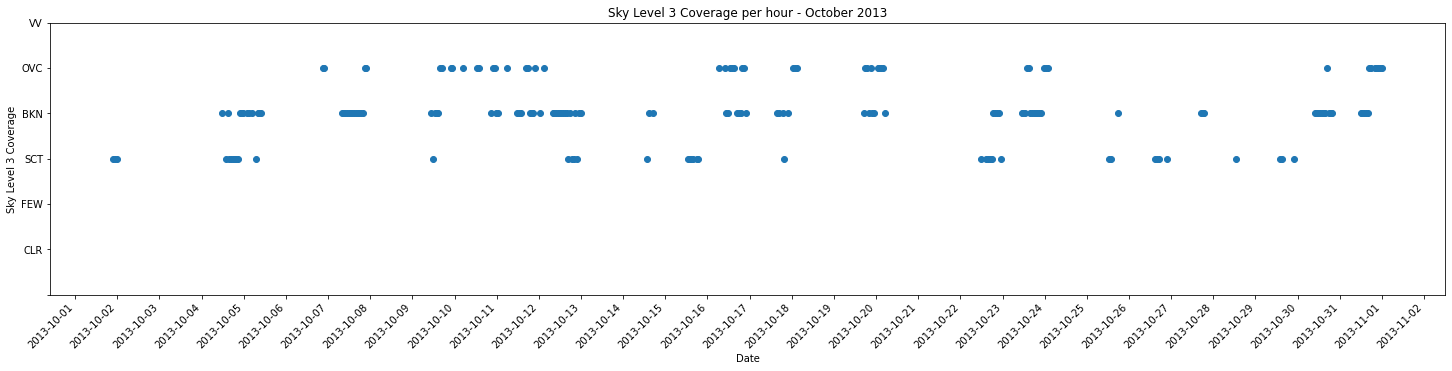

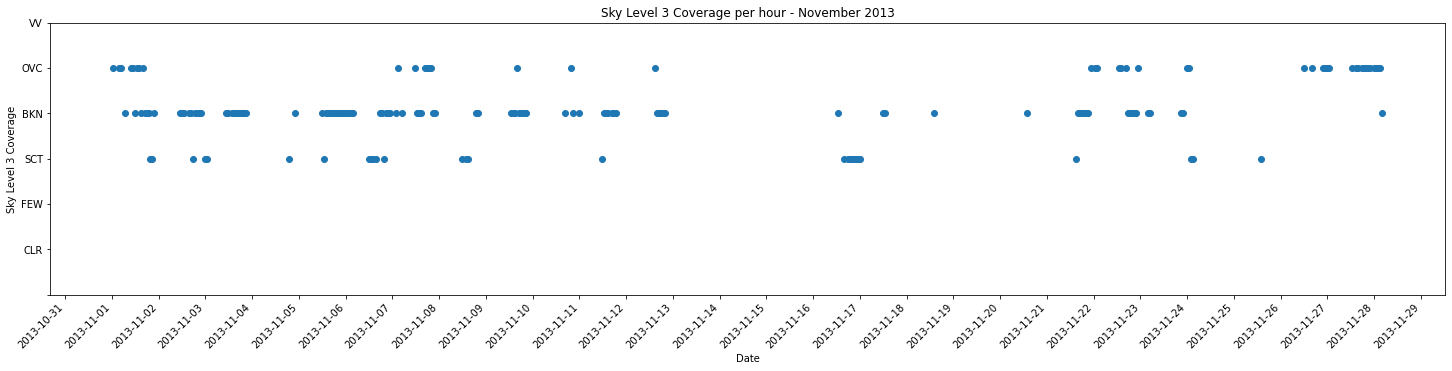

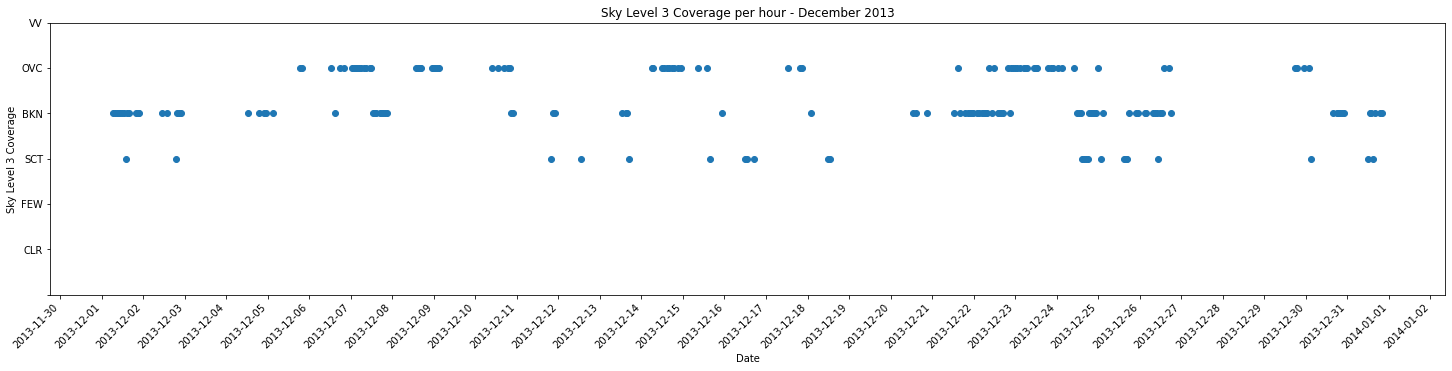

In [11]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Sky Level 3 Coverage'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.yticks(ticks=range(len([' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])),
           labels=[' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Sky Level 3 Coverage')
    plt.title(f'Sky Level 3 Coverage per hour - {month_names[i]} 2013');
    #plt.legend();

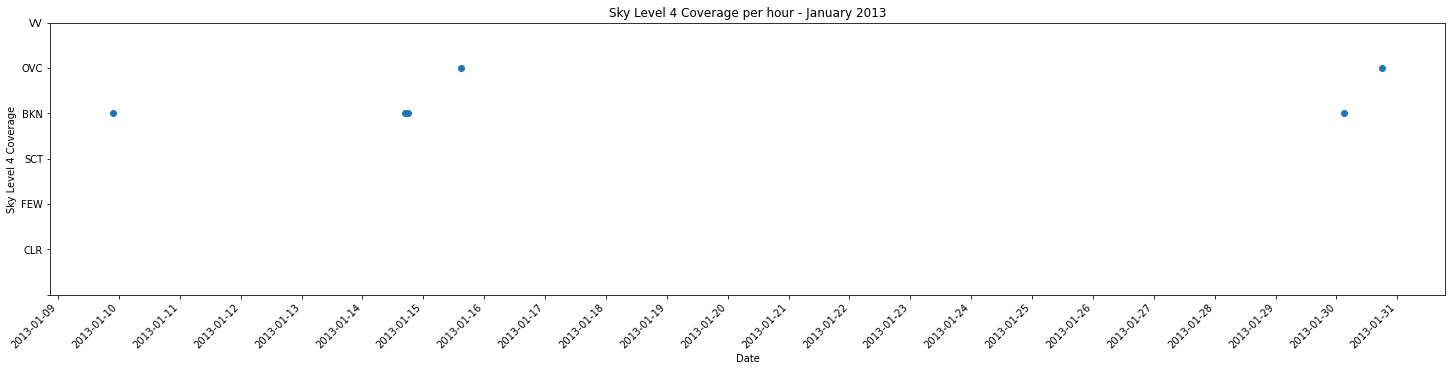

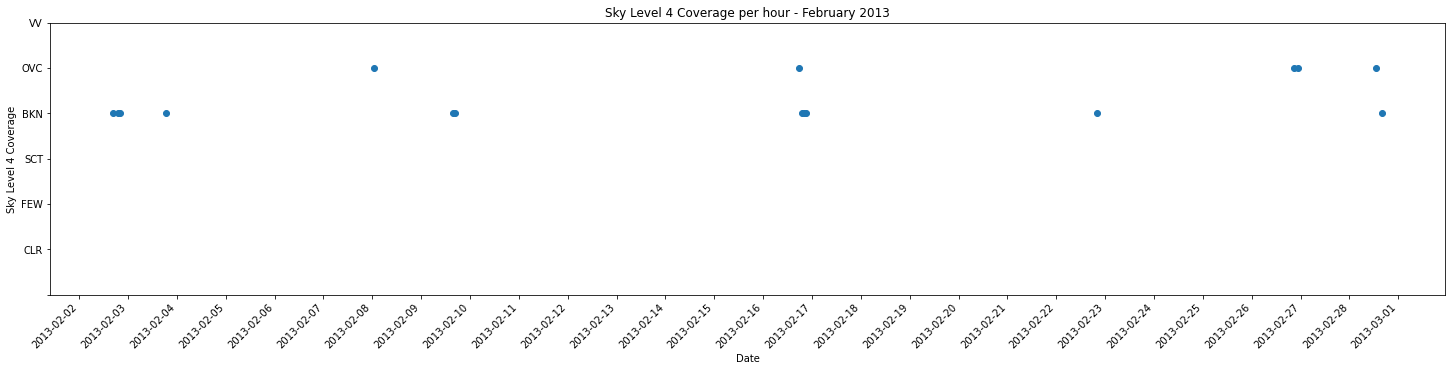

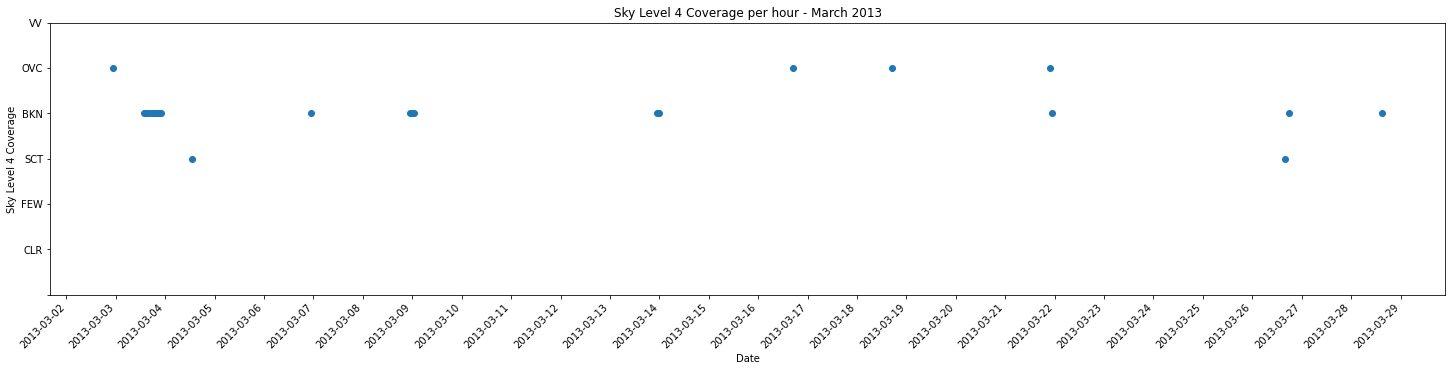

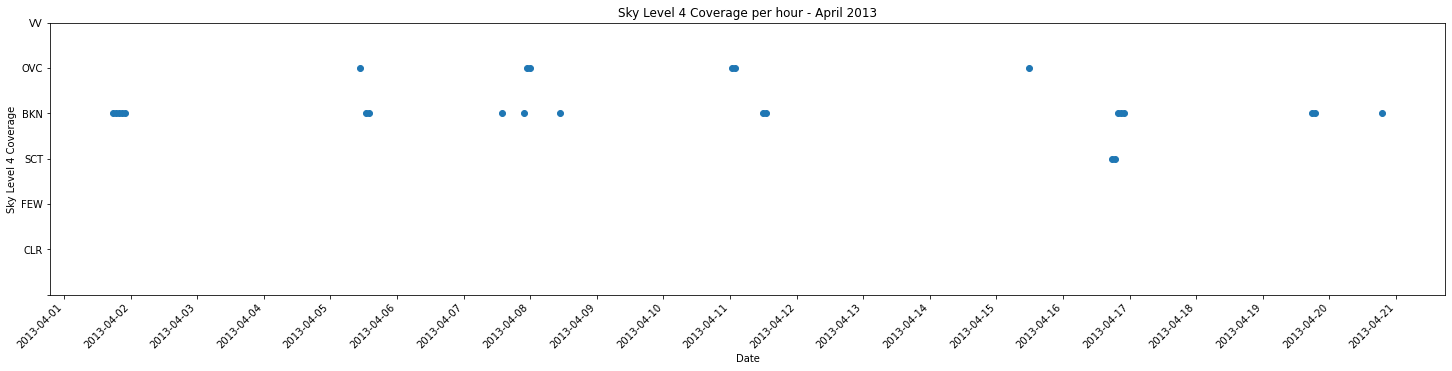

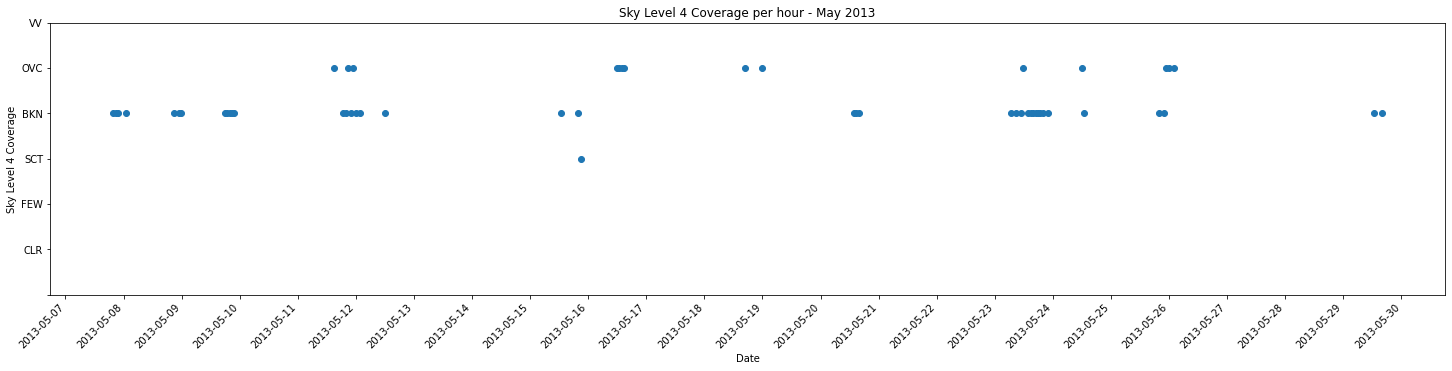

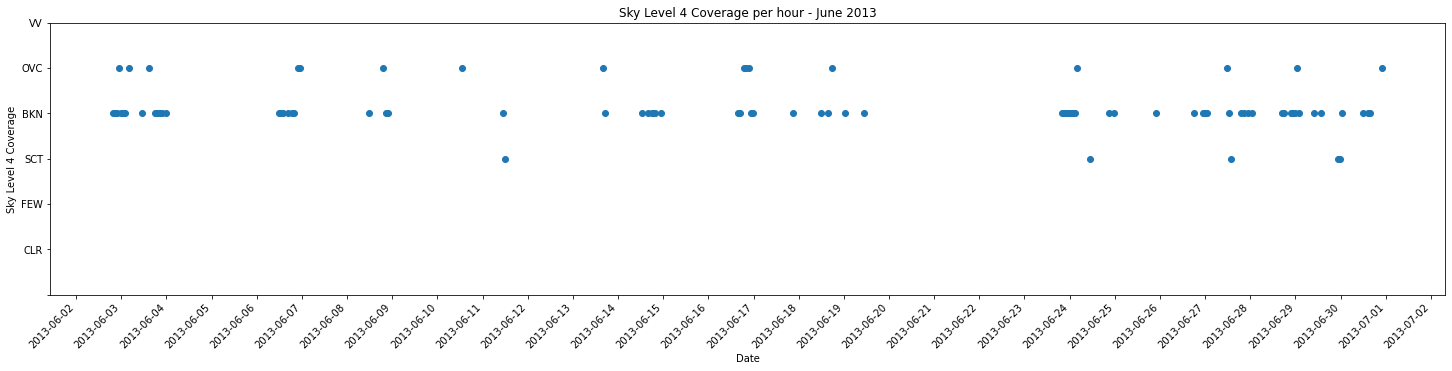

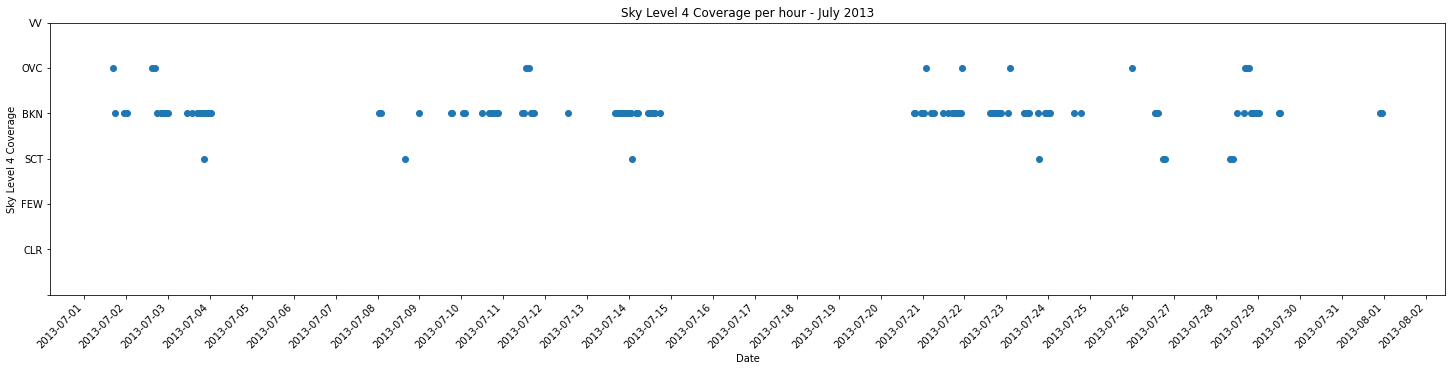

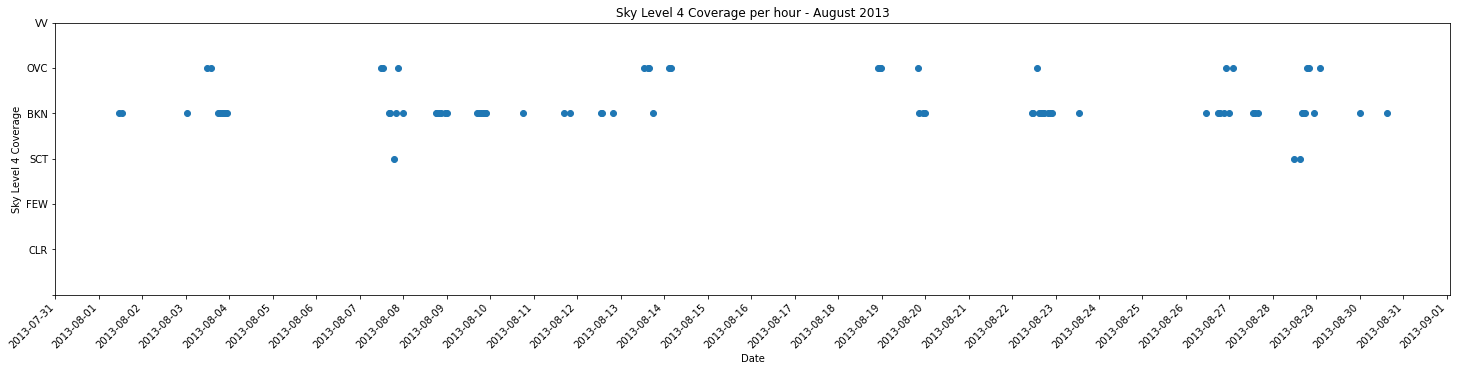

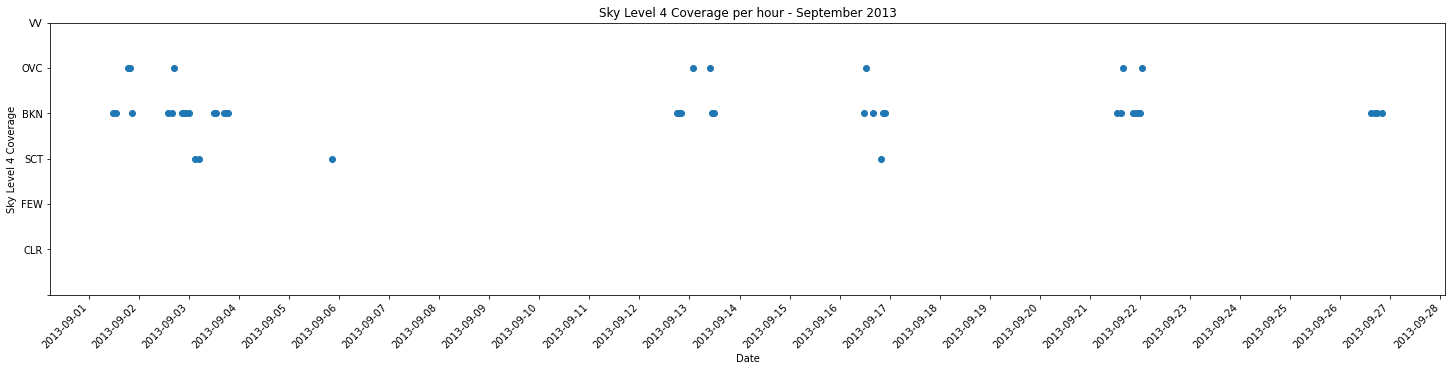

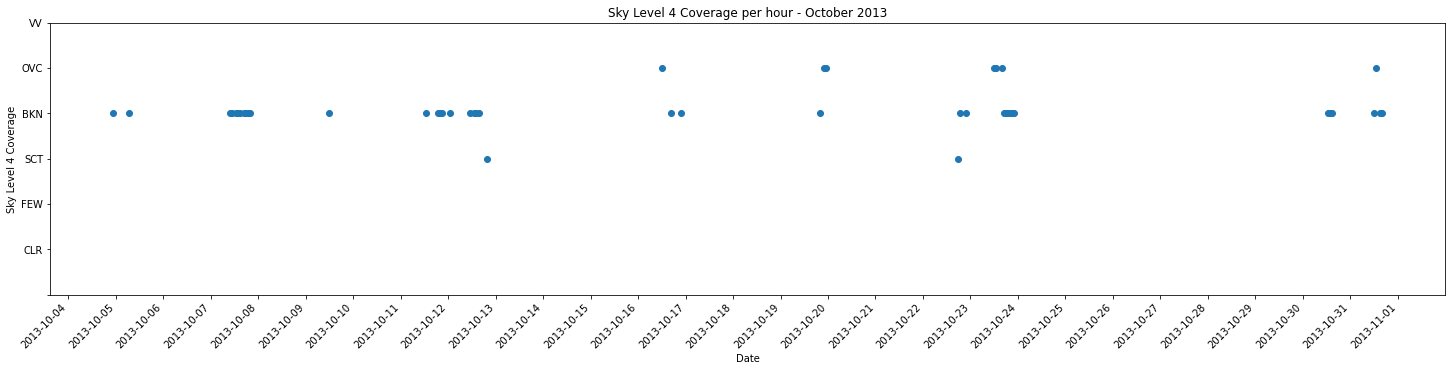

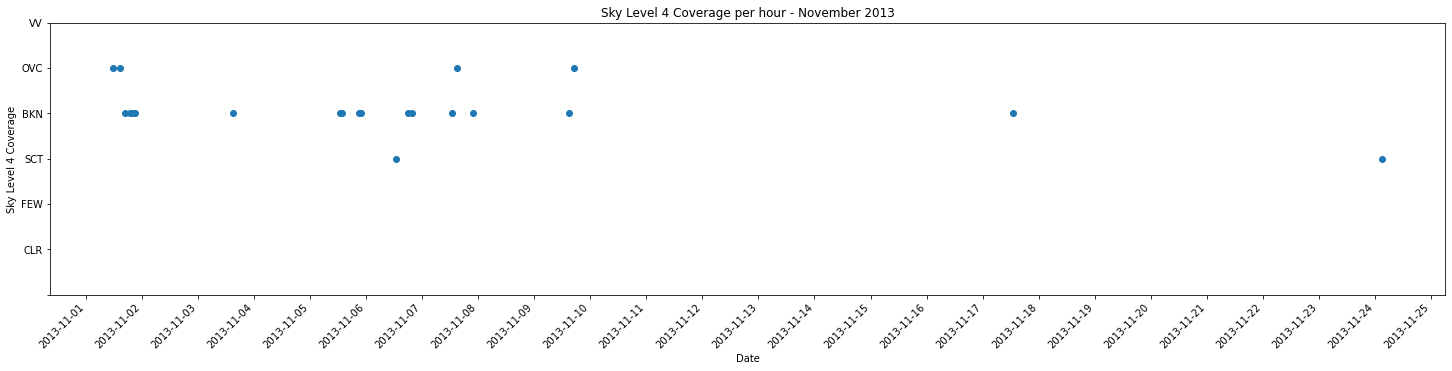

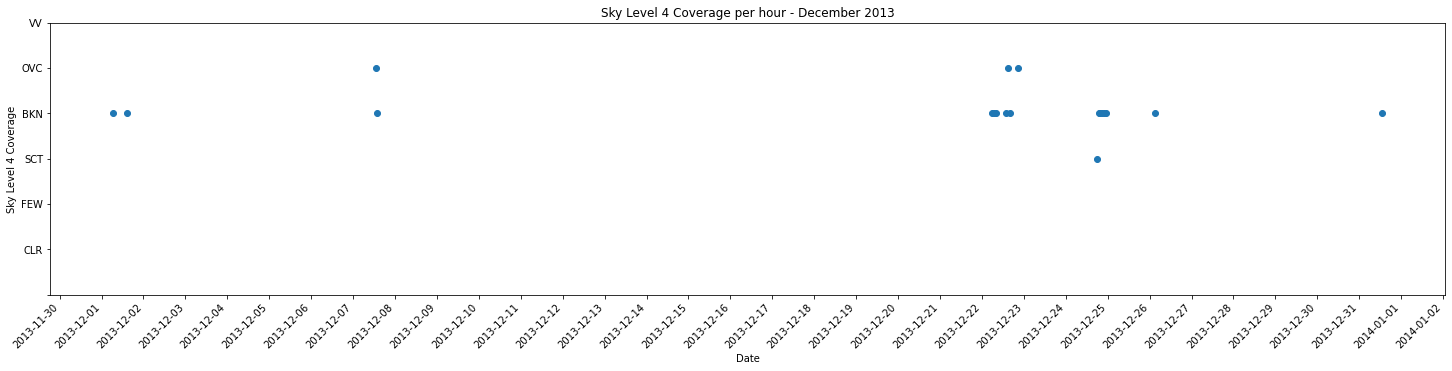

In [12]:
for i in range(len(weather_JFK_month)):
    plt.figure(figsize = (25, 5))
    plt.plot(weather_JFK_month[i]['Sky Level 4 Coverage'], 'o')
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    plt.xticks(rotation=45, ha='right')
    plt.yticks(ticks=range(len([' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])),
           labels=[' ', 'CLR', 'FEW', 'SCT', 'BKN', 'OVC', 'VV'])

    # Labels en titel toevoegen
    plt.xlabel('Date')
    plt.ylabel('Sky Level 4 Coverage')
    plt.title(f'Sky Level 4 Coverage per hour - {month_names[i]} 2013');
    #plt.legend();